Se importan las librerias necesarias para el análisis, junto a esto se realiza la conexión a BigQuery

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import geopandas

import os
os.environ["GCLOUD_PROJECT"] = "utopian-courier-382221"

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows =10
%matplotlib inline


Se listan las tablas que contiene el dataset 'nhtsa_traffic_fatalities'

In [2]:
import bq_helper

# Helper object
openAQ = bq_helper.BigQueryHelper(active_project='bigquery-public-data',
                                 dataset_name='nhtsa_traffic_fatalities')
# List of table
print('El número de tablas es: ', len(openAQ.list_tables()))
lista_tablas = openAQ.list_tables()
print(lista_tablas)

El número de tablas es:  143
[' accident_2015', ' accident_2016', ' accident_2017', ' accident_2018', ' accident_2019', ' accident_2020', ' cevent_2015', ' cevent_2016', ' cevent_2017', ' cevent_2018', ' cevent_2019', ' cevent_2020', ' damage_2015', ' damage_2016', ' damage_2017', ' damage_2018', ' damage_2019', ' damage_2020', ' distract_2015', ' distract_2016', ' distract_2017', ' distract_2018', ' distract_2019', ' distract_2020', ' drimpair_2015', ' drimpair_2016', ' drimpair_2017', ' drimpair_2018', ' drimpair_2019', ' drimpair_2020', ' factor_2015', ' factor_2016', ' factor_2017', ' factor_2018', ' factor_2019', ' factor_2020', ' maneuver_2015', ' maneuver_2016', ' maneuver_2017', ' maneuver_2018', ' maneuver_2019', ' maneuver_2020', ' nmcrash_2015', ' nmcrash_2016', ' nmcrash_2017', ' nmcrash_2018', ' nmcrash_2019', ' nmcrash_2020', ' nmimpair_2015', ' nmimpair_2016', ' nmimpair_2017', ' nmimpair_2018', ' nmimpair_2019', ' nmimpair_2020', ' nmprior_2015', ' nmprior_2016', ' nmpr

Se exploran todas las tablas que tengan en su nombre el número 2015:

In [3]:
import re
lista_vacia = []
lista_2015 = []
for tabla in lista_tablas:
    x = re.search('2015', tabla)
    
    if x:
        lista_2015.append(x.string)
    else: pass
print(len(lista_2015))

38


In [4]:
lista_2015

[' accident_2015',
 ' cevent_2015',
 ' damage_2015',
 ' distract_2015',
 ' drimpair_2015',
 ' factor_2015',
 ' maneuver_2015',
 ' nmcrash_2015',
 ' nmimpair_2015',
 ' nmprior_2015',
 ' parkwork_2015',
 ' pbtype_2015',
 ' safetyeq_2015',
 ' vevent_2015',
 ' vindecode_2015',
 ' violatn_2015',
 ' vision_2015',
 ' vsoe_2015',
 'accident_2015',
 'cevent_2015',
 'damage_2015',
 'distract_2015',
 'drimpair_2015',
 'factor_2015',
 'maneuver_2015',
 'nmcrash_2015',
 'nmimpair_2015',
 'nmprior_2015',
 'parkwork_2015',
 'pbtype_2015',
 'person_2015',
 'safetyeq_2015',
 'vehicle_2015',
 'vevent_2015',
 'vindecode_2015',
 'violatn_2015',
 'vision_2015',
 'vsoe_2015']

Por instrucción del profesor se decide trabajar con 'accident_2015'

Se realiza una query en BigQuery con todas las columnas de la tabla 'accident_2015' del dataset 'nhtsa_traffic_fatalities' del proyecto 'bigquery-public-data'

In [5]:
query = """ SELECT *
            FROM bigquery-public-data.nhtsa_traffic_fatalities.accident_2015
"""


Se transforma la consulta a un DataFrame

In [6]:
df1 = openAQ.query_to_pandas(query)
df1

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,4,Arizona,40610,4,4,0,0,0,7,7,...,99,0,None,0,None,0,None,1,0,2015-09-20 14:55:00+00:00
32534,18,Indiana,180132,4,4,0,0,0,6,6,...,99,0,None,0,None,0,None,1,0,2015-03-10 22:30:00+00:00
32535,13,Georgia,130196,4,4,0,0,0,8,8,...,99,0,None,0,None,0,None,1,0,2015-03-02 06:17:00+00:00
32536,39,Ohio,390468,4,4,0,0,0,6,6,...,38,0,None,0,None,0,None,1,0,2015-07-13 07:54:00+00:00


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32538 entries, 0 to 32537
Data columns (total 70 columns):
 #   Column                                                       Non-Null Count  Dtype              
---  ------                                                       --------------  -----              
 0   state_number                                                 32538 non-null  Int64              
 1   state_name                                                   32538 non-null  object             
 2   consecutive_number                                           32538 non-null  Int64              
 3   number_of_vehicle_forms_submitted_all                        32538 non-null  Int64              
 4   number_of_motor_vehicles_in_transport_mvit                   32538 non-null  Int64              
 5   number_of_parked_working_vehicles                            32538 non-null  Int64              
 6   number_of_forms_submitted_for_persons_not_in_motor_vehicles  32538 non

Se exploran los datos del DataFrame, desplegando el tipo de dato por columna

Se verifica que cada columna tenga datos del mismo tipo

In [8]:
for col in df1.columns:
    if df1[col].apply(type).nunique() == 0:
        print(f"Los tipos de datos de la columna {col} no son todos del mismo tipo")

Se muestra una descripción estadística de cada columna:

In [9]:
for i in range(7):
    display(df1.iloc[:,   i*10 : i*10 + 10].describe())

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,27.484049,275542.16347,1.556273,1.520622,0.035651,0.2171,0.22589,2.282562,2.291352
std,16.283983,162763.509273,0.888945,0.85189,0.267064,0.482805,0.509181,1.938906,1.943591
min,1.0,10001.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,12.0,122043.25,1.0,1.0,0.0,0.0,0.0,1.0,1.0
50%,27.0,270272.5,1.0,1.0,0.0,0.0,0.0,2.0,2.0
75%,42.0,420531.75,2.0,2.0,0.0,0.0,0.0,3.0,3.0
max,56.0,560130.0,58.0,58.0,11.0,16.0,16.0,93.0,93.0


,county,city,day_of_crash,month_of_crash,year_of_crash,day_of_week,hour_of_crash,minute_of_crash,national_highway_system,land_use
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,91.316737,1201.200811,15.554767,6.812588,2015.0,4.10185,13.450181,28.956482,0.399103,1.538017
std,94.942054,1886.078795,8.770617,3.357216,0.0,2.093024,10.173214,18.380886,0.717093,0.628475
min,1.0,0.0,1.0,1.0,2015.0,1.0,0.0,0.0,0.0,1.0
25%,31.0,0.0,8.0,4.0,2015.0,2.0,7.0,14.0,0.0,1.0
50%,71.0,0.0,15.0,7.0,2015.0,4.0,14.0,29.0,0.0,2.0
75%,115.0,1960.0,23.0,10.0,2015.0,6.0,19.0,44.0,1.0,2.0
max,999.0,9999.0,31.0,12.0,2015.0,7.0,99.0,99.0,9.0,9.0


,functional_system,ownership,route_signing,milepoint
count,32538.0,32538.0,32538.0,32538.0
mean,4.680865,25.310406,3.612238,13837.88183
std,8.545826,40.832943,1.836584,34233.465284
min,1.0,1.0,1.0,0.0
25%,3.0,1.0,2.0,0.0
50%,4.0,2.0,3.0,50.0
75%,5.0,25.0,5.0,343.0
max,99.0,99.0,9.0,99999.0


,latitude,longitude,special_jurisdiction,first_harmful_event,manner_of_collision,relation_to_junction_specific_location
count,32538.000000,32538.000000,32538.0,32538.0,32538.0,32538.0
mean,36.864246,-87.588658,0.034022,18.096042,1.809085,2.188856
std,6.584792,72.244471,0.381574,14.073517,5.315107,5.085441
min,19.273050,-166.549556,0.0,1.0,0.0,1.0
25%,33.132206,-98.078382,0.0,8.0,0.0,1.0
50%,36.369224,-87.760242,0.0,12.0,0.0,1.0
75%,40.608136,-81.353815,0.0,30.0,2.0,2.0
max,99.999900,999.999900,9.0,99.0,99.0,99.0


,relation_to_trafficway,light_condition,atmospheric_conditions_1,atmospheric_conditions_2
count,32538.0,32538.0,32538.0,32538.0
mean,2.375254,1.888991,3.492901,0.283545
std,4.437614,1.141131,9.814978,1.645617
min,1.0,1.0,1.0,0.0
25%,1.0,1.0,1.0,0.0
50%,1.0,2.0,1.0,0.0
75%,4.0,2.0,2.0,0.0
max,99.0,9.0,99.0,12.0


,atmospheric_conditions,hour_of_notification,minute_of_notification,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,3.644877,55.336253,63.545301,57.186582,65.025877,71.03688
std,9.84363,43.073511,36.687537,43.02083,36.563776,36.909266
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,14.0,29.0,14.0,30.0,21.0
50%,1.0,23.0,59.0,88.0,88.0,88.0
75%,2.0,99.0,99.0,99.0,99.0,99.0
max,99.0,99.0,99.0,99.0,99.0,99.0


,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers
count,32538.0,32538.0,32538.0,32538.0,32538.0,32538.0
mean,75.622872,1.233481,0.219005,0.124839,1.09054,0.291321
std,30.99221,5.613701,3.680911,3.409601,0.364769,0.472028
min,0.0,0.0,0.0,0.0,1.0,0.0
25%,52.0,0.0,0.0,0.0,1.0,0.0
50%,88.0,0.0,0.0,0.0,1.0,0.0
75%,99.0,0.0,0.0,0.0,1.0,1.0
max,99.0,99.0,99.0,99.0,10.0,3.0


Se trata de entender a qué corresponde la columna 'state_number', se infiere que es un número identificador para cada estado

In [10]:
df1['state_number'][0:7]

0    30
1    39
2    49
3    48
4    41
5    39
6    39
Name: state_number, dtype: Int64

In [11]:
df1[ df1['state_number'] == 39]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
5,39,Ohio,390088,8,8,0,0,0,13,13,...,11,0,None,0,None,0,None,1,0,2015-02-14 11:30:00+00:00
6,39,Ohio,390096,31,31,0,0,0,49,49,...,47,0,None,0,None,0,None,1,0,2015-02-14 14:20:00+00:00
8,39,Ohio,390126,29,29,0,0,0,50,50,...,43,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-02-14 14:22:00+00:00
101,39,Ohio,390122,5,5,0,1,1,7,7,...,88,0,None,0,None,0,None,1,0,2015-03-06 21:34:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32497,39,Ohio,390440,4,4,0,0,0,4,4,...,14,0,None,0,None,0,None,1,2,2015-07-01 20:49:00+00:00
32508,39,Ohio,390456,4,4,0,0,0,4,4,...,40,0,None,0,None,0,None,1,1,2015-07-14 18:03:00+00:00
32514,39,Ohio,390910,4,4,0,0,0,7,7,...,43,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-11-11 19:42:00+00:00
32521,39,Ohio,390407,4,4,0,0,0,6,6,...,52,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-06-28 18:35:00+00:00


Además, se trata de entender la columna consecutive_number, se infiere que es un número que cuenta los accidentes por estado, ya que si se ordenan las columnas por estos valores se obtiene un número que comienza por el número del estado de cada estado y va aumentando de 1 en 1.

Por ejemplo, el 'consecutive_number' del estado de Ohio debe partir con el número 39 y los siguientes digitos corresponderán al número de accidentes

In [12]:
df1[ df1['state_name'] == 'Ohio'].sort_values(['consecutive_number'])

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
24134,39,Ohio,390001,2,2,0,0,0,2,2,...,55,0,None,0,None,0,None,1,1,2015-01-05 06:55:00+00:00
4037,39,Ohio,390002,2,1,1,0,0,2,2,...,36,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,2,1,2015-01-01 15:04:00+00:00
422,39,Ohio,390003,3,1,2,1,1,1,1,...,88,19,Recent Previous Crash Scene Nearby (Since 1989),0,None,0,None,1,0,2015-01-03 07:30:00+00:00
29704,39,Ohio,390004,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-01-14 07:00:00+00:00
29743,39,Ohio,390005,2,2,0,0,0,3,3,...,20,0,None,0,None,0,None,1,1,2015-01-04 19:56:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27798,39,Ohio,391071,2,2,0,1,1,2,2,...,8,16,Non-Occupant Struck Vehicle (Since 1983),14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,1,0,2015-12-22 15:35:00+00:00
26534,39,Ohio,391072,2,2,0,0,0,2,2,...,52,0,None,0,None,0,None,1,0,2015-12-22 21:25:00+00:00
24112,39,Ohio,391073,2,2,0,0,0,3,3,...,3,19,Recent Previous Crash Scene Nearby (Since 1989),0,None,0,None,1,1,2015-07-14 22:17:00+00:00
18053,39,Ohio,391074,1,1,0,0,0,2,2,...,99,0,None,0,None,0,None,1,0,2015-09-30 13:10:00+00:00


In [13]:
df1.sort_values('consecutive_number')

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
11882,1,Alabama,10001,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-01-01 02:40:00+00:00
16228,1,Alabama,10002,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-01-01 22:13:00+00:00
11568,1,Alabama,10003,1,1,0,0,0,2,2,...,99,0,None,0,None,0,None,1,1,2015-01-01 01:25:00+00:00
16680,1,Alabama,10004,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-01-04 00:57:00+00:00
26314,1,Alabama,10005,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-01-07 07:09:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25783,56,Wyoming,560126,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,2,0,2015-12-09 06:29:00+00:00
12917,56,Wyoming,560127,1,1,0,0,0,3,3,...,36,0,None,0,None,0,None,1,1,2015-12-10 22:20:00+00:00
26390,56,Wyoming,560128,2,2,0,0,0,2,2,...,32,0,None,0,None,0,None,1,0,2015-12-13 11:50:00+00:00
20186,56,Wyoming,560129,2,2,0,0,0,4,4,...,18,0,None,0,None,0,None,1,0,2015-12-14 23:05:00+00:00


In [14]:
df1.sort_values('consecutive_number')[780:790]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
9552,1,Alabama,10782,1,1,0,0,0,2,2,...,58,0,None,0,None,0,None,1,0,2015-12-19 07:30:00+00:00
13101,1,Alabama,10783,1,1,0,1,1,1,1,...,88,0,None,0,None,0,None,1,0,2015-12-19 18:30:00+00:00
1287,1,Alabama,10784,1,1,0,0,0,5,5,...,88,0,None,0,None,0,None,3,1,2015-12-25 02:00:00+00:00
1262,1,Alabama,10785,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-10-03 02:19:00+00:00
12997,2,Alaska,20001,1,1,0,0,0,1,1,...,18,0,None,0,None,0,None,1,1,2015-02-05 00:22:00+00:00
14558,2,Alaska,20002,1,1,0,1,1,2,2,...,17,0,None,0,None,0,None,1,0,2015-01-09 20:01:00+00:00
3603,2,Alaska,20003,1,1,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-01-21 02:22:00+00:00
6012,2,Alaska,20004,1,1,0,0,0,2,2,...,14,0,None,0,None,0,None,1,1,2015-02-07 00:33:00+00:00
16516,2,Alaska,20005,1,1,0,1,1,5,5,...,88,0,None,0,None,0,None,1,0,2015-03-04 13:34:00+00:00
30838,2,Alaska,20006,3,3,0,0,0,6,6,...,41,0,None,0,None,0,None,1,0,2015-03-12 18:06:00+00:00


In [15]:
df1.sort_values('consecutive_number')[32000:32010]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
16470,55,Wisconsin,550117,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2015-04-20 17:18:00+00:00
7652,55,Wisconsin,550118,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-04-18 18:50:00+00:00
17437,55,Wisconsin,550119,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,1,2015-04-21 23:00:00+00:00
25430,55,Wisconsin,550120,2,2,0,0,0,10,10,...,5,14,Motor Vehicle (In Transport 1983-2004) Struck ...,0,None,0,None,1,0,2015-04-17 04:38:00+00:00
28549,55,Wisconsin,550121,2,2,0,0,0,5,5,...,99,0,None,0,None,0,None,1,0,2015-04-22 11:07:00+00:00
10527,55,Wisconsin,550122,1,1,0,1,1,3,3,...,88,0,None,0,None,0,None,1,1,2015-04-23 02:32:00+00:00
23189,55,Wisconsin,550123,2,2,0,0,0,2,2,...,99,0,None,0,None,0,None,1,0,2015-04-28 11:32:00+00:00
7620,55,Wisconsin,550124,1,1,0,0,0,1,1,...,45,0,None,0,None,0,None,1,0,2015-04-29 14:21:00+00:00
27100,55,Wisconsin,550125,2,2,0,0,0,2,2,...,29,3,Other Maintenance or Construction-Created Cond...,0,None,0,None,2,0,2015-04-27 13:49:00+00:00
22486,55,Wisconsin,550126,2,2,0,0,0,2,2,...,88,0,None,0,None,0,None,1,0,2015-04-28 06:24:00+00:00


## Pegunta 1: Crear un diccionario de datos

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32538 entries, 0 to 32537
Data columns (total 70 columns):
 #   Column                                                       Non-Null Count  Dtype              
---  ------                                                       --------------  -----              
 0   state_number                                                 32538 non-null  Int64              
 1   state_name                                                   32538 non-null  object             
 2   consecutive_number                                           32538 non-null  Int64              
 3   number_of_vehicle_forms_submitted_all                        32538 non-null  Int64              
 4   number_of_motor_vehicles_in_transport_mvit                   32538 non-null  Int64              
 5   number_of_parked_working_vehicles                            32538 non-null  Int64              
 6   number_of_forms_submitted_for_persons_not_in_motor_vehicles  32538 non

In [17]:
query1 = """SELECT * FROM `bigquery-public-data`.nhtsa_traffic_fatalities.INFORMATION_SCHEMA.COLUMN_FIELD_PATHS
WHERE table_name = 'accident_2015'"""
dfinfo = openAQ.query_to_pandas(query1)

In [18]:
dfinfo

,table_catalog,table_schema,table_name,column_name,field_path,data_type,description,collation_name,rounding_mode
0,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,state_number,state_number,INT64,This data element identifies the state in whic...,NULL,None
1,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,state_name,state_name,STRING,This data element identifies the state in whic...,NULL,None
2,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,consecutive_number,consecutive_number,INT64,This data element is the unique case number as...,NULL,None
3,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,number_of_vehicle_forms_submitted_all,number_of_vehicle_forms_submitted_all,INT64,number_of_vehicle_forms_submitted_all,NULL,None
4,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,number_of_motor_vehicles_in_transport_mvit,number_of_motor_vehicles_in_transport_mvit,INT64,This data element is a count of the number of ...,NULL,None
...,...,...,...,...,...,...,...,...,...
65,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,related_factors_crash_level_3,related_factors_crash_level_3,INT64,This data element records factors related to t...,NULL,None
66,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,related_factors_crash_level_3_name,related_factors_crash_level_3_name,STRING,This data element records factors related to t...,NULL,None
67,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,number_of_fatalities,number_of_fatalities,INT64,This data element records the number of fatall...,NULL,None
68,bigquery-public-data,nhtsa_traffic_fatalities,accident_2015,number_of_drunk_drivers,number_of_drunk_drivers,INT64,This data element records the number of drunk ...,NULL,None


In [19]:
ejemplos = list(df1[15:16].to_numpy()[0])
#ejemplos.pop()
dfinfo['example'] = ejemplos

In [20]:
dfinfo.drop(['table_catalog'], axis=1, inplace= True)
dfinfo.drop(['table_schema'], axis=1, inplace= True)
dfinfo.drop(['table_name'], axis=1, inplace= True)
dfinfo.drop(['collation_name'], axis=1, inplace= True)
dfinfo.drop(['rounding_mode'], axis=1, inplace= True)
dfinfo



,column_name,field_path,data_type,description,example
0,state_number,state_number,INT64,This data element identifies the state in whic...,26
1,state_name,state_name,STRING,This data element identifies the state in whic...,Michigan
2,consecutive_number,consecutive_number,INT64,This data element is the unique case number as...,260662
3,number_of_vehicle_forms_submitted_all,number_of_vehicle_forms_submitted_all,INT64,number_of_vehicle_forms_submitted_all,5
4,number_of_motor_vehicles_in_transport_mvit,number_of_motor_vehicles_in_transport_mvit,INT64,This data element is a count of the number of ...,5
...,...,...,...,...,...
65,related_factors_crash_level_3,related_factors_crash_level_3,INT64,This data element records factors related to t...,0
66,related_factors_crash_level_3_name,related_factors_crash_level_3_name,STRING,This data element records factors related to t...,None
67,number_of_fatalities,number_of_fatalities,INT64,This data element records the number of fatall...,1
68,number_of_drunk_drivers,number_of_drunk_drivers,INT64,This data element records the number of drunk ...,1


In [21]:
dfinfo[35:44]

,column_name,field_path,data_type,description,example
35,first_harmful_event_name,first_harmful_event_name,STRING,This data element describes the first injury o...,Motor Vehicle in Transport
36,manner_of_collision,manner_of_collision,INT64,This data element describes the orientation of...,1
37,manner_of_collision_name,manner_of_collision_name,STRING,This data element describes the orientation of...,Front-to-Rear
38,relation_to_junction_within_interchange_area,relation_to_junction_within_interchange_area,STRING,This data element identifies the crash's locat...,No
39,relation_to_junction_specific_location,relation_to_junction_specific_location,INT64,This data element identifies the crash's locat...,3
40,relation_to_junction_specific_location_name,relation_to_junction_specific_location_name,STRING,This data element identifies the crash's locat...,Intersection Related
41,type_of_intersection,type_of_intersection,STRING,This data element identifies and allows separa...,Four-Way Intersection
42,work_zone,work_zone,STRING,This data element identifies a motor vehicle t...,None
43,relation_to_trafficway,relation_to_trafficway,INT64,This data element identifies the location of t...,1


In [22]:
a = df1[ df1['work_zone'] != 'None']
a['work_zone']

32       Construction
33       Construction
36       Construction
37       Construction
38       Construction
             ...     
32418         Utility
32438    Construction
32439    Construction
32451    Construction
32523    Construction
Name: work_zone, Length: 657, dtype: object

In [23]:
print(dfinfo.iloc[42, 4])
dfinfo.iloc[42, 4] = 'Construciton'
print(dfinfo.iloc[42, 4])

None
Construciton


In [24]:
dfinfo[55:64]

,column_name,field_path,data_type,description,example
55,hour_of_notification,hour_of_notification,INT64,This data element records the hour that emerge...,99
56,minute_of_notification,minute_of_notification,INT64,This data element records the minutes after th...,99
57,hour_of_arrival_at_scene,hour_of_arrival_at_scene,INT64,This data element records the hour that emerge...,99
58,minute_of_arrival_at_scene,minute_of_arrival_at_scene,INT64,This data element records the minutes after th...,99
59,hour_of_ems_arrival_at_hospital,hour_of_ems_arrival_at_hospital,INT64,This data element records the hour that emerge...,99
60,minute_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,INT64,This data element records the minutes after th...,99
61,related_factors_crash_level_1,related_factors_crash_level_1,INT64,This data element records factors related to t...,0
62,related_factors_crash_level_1_name,related_factors_crash_level_1_name,STRING,This data element records factors related to t...,None
63,related_factors_crash_level_2,related_factors_crash_level_2,INT64,This data element records factors related to t...,0


In [25]:
a = df1[ df1['related_factors_crash_level_1_name'] != 'None']
a['related_factors_crash_level_1_name']

1                                Backup Due to Prior Crash
8        Motor Vehicle (In Transport 1983-2004) Struck ...
14       Motor Vehicle (In Transport 1983-2004) Struck ...
16       Motor Vehicle (In Transport 1983-2004) Struck ...
19       Indication of a Stalled/Disabled Vehicle (Sinc...
                               ...                        
32518    Motor Vehicle (In Transport 1983-2004) Struck ...
32521    Motor Vehicle (In Transport 1983-2004) Struck ...
32526    Motor Vehicle (In Transport 1983-2004) Struck ...
32531    Indication of a Stalled/Disabled Vehicle (Sinc...
32532                                              Unknown
Name: related_factors_crash_level_1_name, Length: 2117, dtype: object

In [26]:
print(df1.iloc[8, 62])
dfinfo.iloc[62,4] = df1.iloc[8, 62]
dfinfo[61:64]

Motor Vehicle (In Transport 1983-2004) Struck By Falling Cargo or
Something That Came Loose From or Something That Was Set in Motion By
a Vehicle
(Since 1983)


,column_name,field_path,data_type,description,example
61,related_factors_crash_level_1,related_factors_crash_level_1,INT64,This data element records factors related to t...,0
62,related_factors_crash_level_1_name,related_factors_crash_level_1_name,STRING,This data element records factors related to t...,Motor Vehicle (In Transport 1983-2004) Struck ...
63,related_factors_crash_level_2,related_factors_crash_level_2,INT64,This data element records factors related to t...,0


In [27]:
dfinfo[62:71]

,column_name,field_path,data_type,description,example
62,related_factors_crash_level_1_name,related_factors_crash_level_1_name,STRING,This data element records factors related to t...,Motor Vehicle (In Transport 1983-2004) Struck ...
63,related_factors_crash_level_2,related_factors_crash_level_2,INT64,This data element records factors related to t...,0
64,related_factors_crash_level_2_name,related_factors_crash_level_2_name,STRING,This data element records factors related to t...,None
65,related_factors_crash_level_3,related_factors_crash_level_3,INT64,This data element records factors related to t...,0
66,related_factors_crash_level_3_name,related_factors_crash_level_3_name,STRING,This data element records factors related to t...,None
67,number_of_fatalities,number_of_fatalities,INT64,This data element records the number of fatall...,1
68,number_of_drunk_drivers,number_of_drunk_drivers,INT64,This data element records the number of drunk ...,1
69,timestamp_of_crash,timestamp_of_crash,TIMESTAMP,This data element records the date and time on...,2015-10-03 21:30:00+00:00


In [28]:
a = df1[ df1['related_factors_crash_level_2_name'] != 'None']
a['related_factors_crash_level_2_name']

16                    Police-Pursuit-Involved (Since 1994)
25       Motor Vehicle (In Transport 1983-2004) Struck ...
30         Recent Previous Crash Scene Nearby (Since 1989)
58                    Police-Pursuit-Involved (Since 1994)
71                        Backup Due to Regular Congestion
                               ...                        
32343                 Police-Pursuit-Involved (Since 1994)
32402                 Police-Pursuit-Involved (Since 1994)
32473                 Police-Pursuit-Involved (Since 1994)
32478             Non-Occupant Struck Vehicle (Since 1983)
32532                                              Unknown
Name: related_factors_crash_level_2_name, Length: 213, dtype: object

In [29]:
dfinfo.iloc[64,4] = 'Police-Pursuit-Involved (Since 1994)'

In [30]:
a = df1[ df1['related_factors_crash_level_3_name'] != 'None']
a['related_factors_crash_level_3_name']

169                              Backup Due to Prior Crash
423                                                Unknown
424                                                Unknown
425                                                Unknown
426                                                Unknown
                               ...                        
31896    Non-Occupant Struck By Falling Cargo, or Somet...
31897    Indication of a Stalled/Disabled Vehicle (Sinc...
31898                                              Unknown
32478                 Police-Pursuit-Involved (Since 1994)
32532                                              Unknown
Name: related_factors_crash_level_3_name, Length: 53, dtype: object

In [31]:
dfinfo.iloc[66,4] = 'Police-Pursuit-Involved (Since 1994)'

In [32]:
dfinfo.to_csv('diccionario_de_datos.csv')

## Pregunta 2.1: Mayor numero de accidentes por estado

Se crea una lista con todos sus valores igual a 1, con el mismo largo de las columnas del DataFrame, esto se utilizará para contar el número de accidentes por estado.

In [33]:
df1['contador'] = [1 for x in range(32538)]

Se agrupa el DataFrame por el valor de 'state_number', y se suman las columnas, de este modo al ver la columna contador, se sabrá cuántos accidentes hubieron por cada estado, con esto, se podrá saber el estado con mayor número de accidentes.

In [34]:
df1.groupby(['state_name']).sum()[0:40]

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
state_name,,,,,,,,,,,,,,,,,,,,,
Alabama,784,8148405,1202,1184,18,123,133,1748,1758,58396,...,14091,25669,66630,67664,842,94,50,850,221,784
Alaska,120,1201830,88,88,0,13,13,145,145,5407,...,2004,2779,3058,3610,91,14,0,65,24,60
Arizona,3244,32783422,1282,1246,36,203,209,1977,1983,13163,...,23565,34519,43341,50151,991,67,28,897,242,811
Arkansas,2455,24674763,776,759,17,54,57,1115,1118,36983,...,12542,19524,46893,46893,596,224,198,550,142,491
California,18738,192271214,4912,4718,194,1058,1091,7055,7088,178357,...,307497,307831,295648,295695,5777,605,198,3387,1005,3123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ohio,40131,401864725,1691,1639,52,170,184,2327,2341,86579,...,21980,37962,41868,52653,962,70,0,1110,332,1029
Oklahoma,23600,236175820,907,893,14,87,92,1396,1401,53006,...,14572,23716,26035,31341,760,119,27,645,163,590
Oregon,16851,168595210,611,599,12,86,87,918,919,15429,...,11121,16381,28816,31176,323,0,0,446,156,411


In [35]:
df_numero_accidentes = df1.groupby(['state_name'], as_index=False).sum().sort_values(['contador'])

In [36]:
df_numero_accidentes

,state_name,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
8,District of Columbia,253,2530276,32,30,2,18,18,45,45,...,596,876,829,1101,23,0,0,23,5,23
39,Rhode Island,1804,18040891,58,58,0,9,9,101,101,...,522,1187,1121,1819,21,0,0,45,18,41
45,Vermont,2500,25001275,72,70,2,9,9,104,104,...,962,1465,2308,2659,83,0,0,57,14,50
1,Alaska,120,1201830,88,88,0,13,13,145,145,...,2004,2779,3058,3610,91,14,0,65,24,60
11,Hawaii,1275,12753761,132,124,8,31,33,193,195,...,1172,2916,2982,3984,155,14,0,93,27,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,North Carolina,47175,472569583,1979,1949,30,225,226,2895,2896,...,31771,48898,68993,78999,1057,99,0,1379,399,1275
10,Georgia,17277,173659745,2072,2049,23,233,240,3057,3064,...,65207,77286,73511,83251,1072,85,0,1432,304,1329
9,Florida,32388,327694778,4238,4164,74,860,872,6191,6203,...,261531,262700,257393,257395,1843,92,0,2938,644,2699
4,California,18738,192271214,4912,4718,194,1058,1091,7055,7088,...,307497,307831,295648,295695,5777,605,198,3387,1005,3123


Se puede notar que el mayor número de accidentes se produjeron en el estado de Texas con 3190 accidentes, lo siguen California con 3123 y Florida con 2699, estos 3 estados destacan en gran proporción sobre el resto.
Lo que puede notarse mejor en un gráfico de barras:

Se Muestran los 11 estados con mayor número de accidentes el año 2015


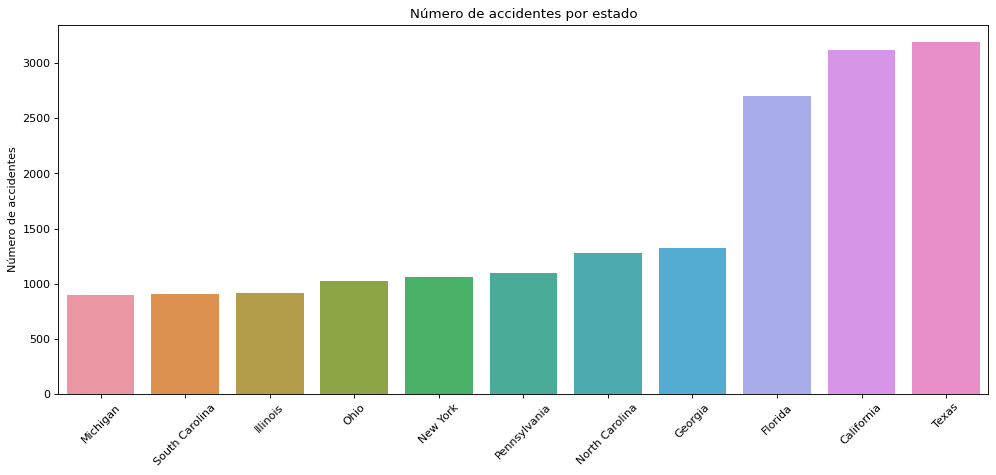

In [37]:
figure(figsize=(15, 6), dpi=80)


sns.barplot(data = df_numero_accidentes[40:], x = 'state_name', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Número de accidentes por estado')
print('Se Muestran los 11 estados con mayor número de accidentes el año 2015')

Se Muestran los 11 estados con mayor número de accidentes el año 2015:

## Pregunta 2.2: Mayor número de accidentes por uso de tierra

In [38]:
df1.loc[:, ['state_name', 'land_use','land_use_name'] ]

,state_name,land_use,land_use_name
0,Montana,1,Rural
1,Ohio,1,Rural
2,Utah,1,Rural
3,Texas,1,Rural
4,Oregon,1,Rural
...,...,...,...
32533,Arizona,2,Urban
32534,Indiana,1,Rural
32535,Georgia,2,Urban
32536,Ohio,1,Rural


In [39]:
print(df1['land_use'].max())
print(df1['land_use'].min())

9
1


In [40]:
df1[ df1['land_use'] == 2]['land_use_name']

7        Urban
8        Urban
9        Urban
16       Urban
19       Urban
         ...  
32529    Urban
32531    Urban
32532    Urban
32533    Urban
32535    Urban
Name: land_use_name, Length: 16494, dtype: object

In [41]:
df1[ df1['land_use'] == 9]['land_use_name']

429      Unknown
668      Unknown
860      Unknown
1895     Unknown
2031     Unknown
          ...   
21073    Unknown
24981    Unknown
27909    Unknown
29573    Unknown
31346    Unknown
Name: land_use_name, Length: 24, dtype: object

In [42]:
df1[ df1['land_use'] == 8]['land_use_name']

857      Not Reported
1432     Not Reported
6536     Not Reported
6537     Not Reported
6538     Not Reported
6539     Not Reported
6540     Not Reported
6546     Not Reported
6551     Not Reported
21984    Not Reported
Name: land_use_name, dtype: object

In [43]:
df1.groupby(['land_use_name']).sum().sort_values(['contador'])

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
land_use_name,,,,,,,,,,,,,,,,,,,,,
Not Reported,303,3037221,11,11,0,3,3,13,13,1555,...,807,842,885,877,0,0,0,11,4,10
Unknown,732,7337186,34,33,1,2,2,53,53,4647,...,1432,1665,1742,1870,99,99,99,27,4,24
Trafficway Not in State Inventory,2790,28098039,237,222,15,45,45,331,331,12419,...,11519,12143,12782,13028,213,23,0,158,40,150
Rural,455304,4562654059,24045,23757,288,1673,1781,36538,36646,1477424,...,841163,976620,1132929,1202619,16445,2363,1035,17715,4854,15860
Urban,435147,4364464410,26311,25455,856,5341,5519,37335,37513,1475219,...,1005816,1124542,1163060,1242223,23378,4641,2928,17573,4577,16494


In [44]:
df1.groupby(['land_use']).sum().sort_values(['contador'])

,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,county,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
land_use,,,,,,,,,,,,,,,,,,,,,
8,303,3037221,11,11,0,3,3,13,13,1555,...,807,842,885,877,0,0,0,11,4,10
9,732,7337186,34,33,1,2,2,53,53,4647,...,1432,1665,1742,1870,99,99,99,27,4,24
6,2790,28098039,237,222,15,45,45,331,331,12419,...,11519,12143,12782,13028,213,23,0,158,40,150
1,455304,4562654059,24045,23757,288,1673,1781,36538,36646,1477424,...,841163,976620,1132929,1202619,16445,2363,1035,17715,4854,15860
2,435147,4364464410,26311,25455,856,5341,5519,37335,37513,1475219,...,1005816,1124542,1163060,1242223,23378,4641,2928,17573,4577,16494


In [45]:
df_uso_tierra = df1.groupby(['land_use_name'], as_index=False).sum().sort_values(['contador'])

Text(0.5, 1.0, 'Número de accidentes por uso de tierra')

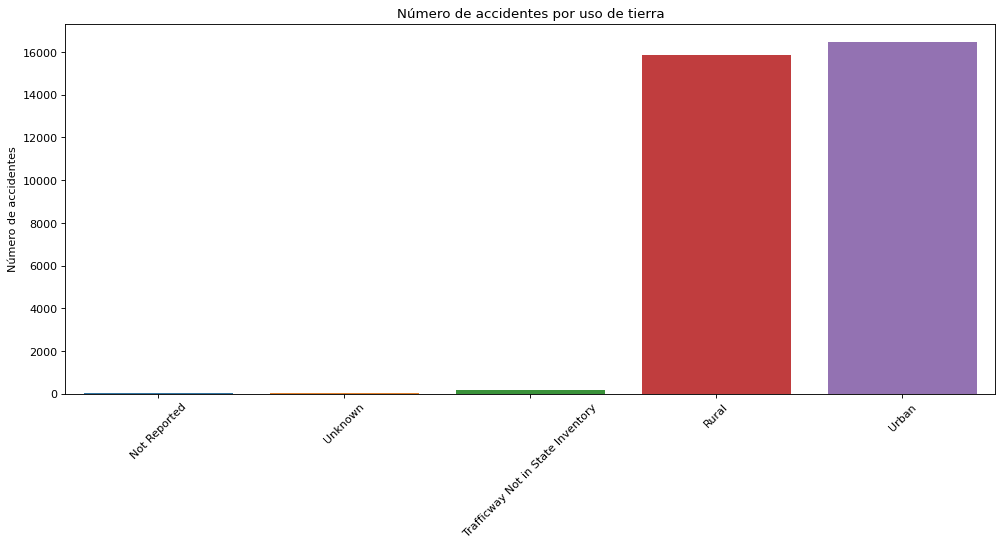

In [46]:
figure(figsize=(15, 6), dpi=80)

sns.barplot(data = df_uso_tierra, x = 'land_use_name', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Número de accidentes por uso de tierra')

Como los accidentes urbanos y rurales destacan en gran proporción sobre el resto, conviene crear un gráfico utiilizando solamente con los datos de los accidentes urbanos y rurales.

In [47]:
partes = [df_uso_tierra.iloc[i,-1] for i in range(5)]
print(partes)
labels = [df_uso_tierra.iloc[i,0] for i in range(5)]
labels

[10, 24, 150, 15860, 16494]


['Not Reported',
 'Unknown',
 'Trafficway Not in State Inventory',
 'Rural',
 'Urban']

In [48]:
15860 + 16494

32354

In [49]:
15860 / 32354

0.4902021388390925

([<matplotlib.patches.Wedge at 0x20e785d1610>,
 [Text(1.0999994872795136, 0.0010620662914606989, 'Not Reported'),
  Text(1.0999900737455388, 0.004673078352020413, 'Unknown'),
  Text(1.0997563436758668, 0.023151340019291974, 'Trafficway Not in State Inventory'),
  Text(0.0043544124204652045, 1.0999913813719056, 'Rural'),
  Text(-0.023894583133712302, -1.0997404461493931, 'Urban')],
 [Text(0.5999997203342801, 0.0005793088862512902, '0%'),
  Text(0.5999945856793848, 0.0025489518283747705, '0%'),
  Text(0.5998670965504728, 0.01262800364688653, '0%'),
  Text(0.0023751340475264746, 0.5999952989301301, '49%'),
  Text(-0.01303340898202489, -0.5998584251723962, '51%')])

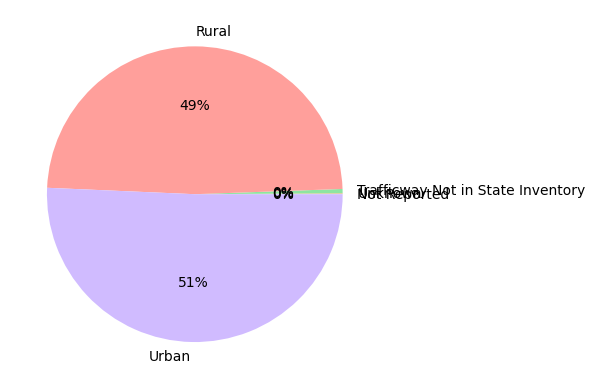

In [50]:

colors = sns.color_palette('pastel')
plt.pie(x=partes, labels=labels,colors = colors, autopct = '%0.0f%%')

([<matplotlib.patches.Wedge at 0x20e785770a0>,
 [Text(0.03385366544808106, 1.0994789353760852, 'Rural'),
  Text(-0.033853665448080716, -1.0994789353760852, 'Urban')],
 [Text(0.018465635698953306, 0.59971578293241, '49%'),
  Text(-0.018465635698953115, -0.59971578293241, '51%')])

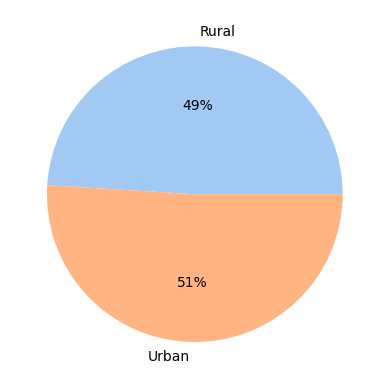

In [51]:
partes = partes[-2:]
labels = labels[-2:]
colors = sns.color_palette('pastel')
plt.pie(x=partes, labels=labels,colors = colors, autopct = '%0.0f%%')

Se puede notar que los accidentes urbanos y rurales ocurren casi con la misma frecuencia.

## Pregunta 2.3: Mayor numero de accidentes por empresa de carreteras

In [52]:
df_empresa_carretera = df1.groupby(['ownership_name'], as_index=False).sum().sort_values(['contador'])

In [53]:
df_empresa_carretera

,ownership_name,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
0,Bureau of Fish and Wildlife,30,300149,1,1,0,0,0,1,1,...,12,57,88,88,0,0,0,1,0,1
6,"Local Park, Forest or Reservation Agency",16,160157,1,1,0,0,0,2,2,...,17,54,99,99,0,0,0,1,1,1
8,Navy/Marines,53,530052,1,1,0,0,0,1,1,...,8,4,88,88,0,0,0,1,0,1
12,"Other Public Instrumentality [i.e., Airport]",28,280791,2,2,0,1,1,1,1,...,17,112,104,100,24,0,0,2,1,2
2,Bureau of Land Management,147,1470673,5,4,1,1,1,3,3,...,53,117,352,352,0,0,0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,Unknown,42574,426427715,1739,1712,27,201,203,2518,2520,...,34417,48424,64842,73147,900,176,99,1225,349,1139
4,County Highway Agency,89715,898463713,4374,4320,54,429,442,6541,6554,...,162058,193813,226453,242673,2184,336,198,3539,1253,3295
3,City or Municipal Highway Agency,86262,864313867,5035,4800,235,1296,1323,7001,7028,...,187364,215725,227904,246142,3414,723,614,3553,954,3390
9,Not Reported,174396,1752459290,9847,9587,260,1689,1734,14439,14484,...,471462,500993,505796,524807,9831,832,326,6982,1925,6388


Text(0.5, 1.0, 'Número de accidentes por empresa de carretera')

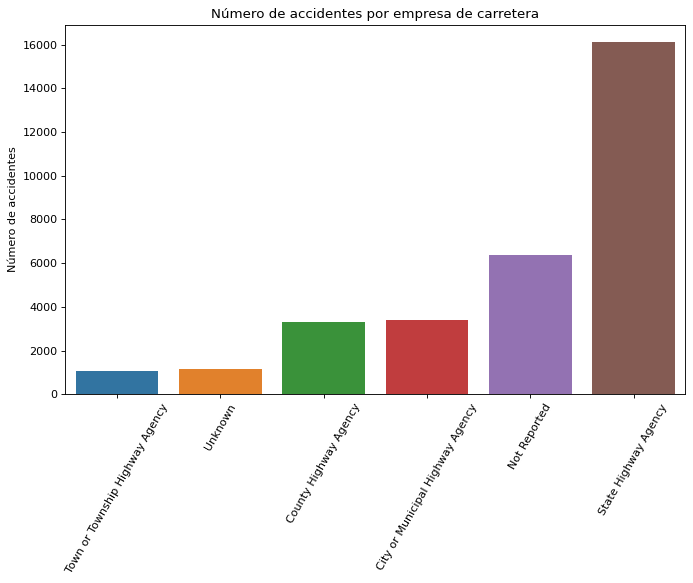

In [54]:
figure(figsize=(10, 6), dpi=80)

sns.barplot(data = df_empresa_carretera[16:], x = 'ownership_name', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=60)
plt.title('Número de accidentes por empresa de carretera')

Se observa que la empresa 'State Highway Agency' presenta el mayor número de accidentes de todas las empresas de carreteras, lo que podría indicar un problema con dicha empresa. Sin embargo, para tener un análisis más completo, es necesario considerar el largo de las carreteras de cada empresa. Es posible que 'State Highway Agency' tenga la mayor cantidad de carreteras en Estados Unidos, por lo que su número de accidentes podría ser proporcionalmente menor en comparación con otras empresas.  

Por otro lado, se puede destacar que hay un número importante de accidentes en los cuales no se reporta o es desconocida la carretera donde fue el accidente.

## Pregunta 2.4: Mayor numero de accidentes por carretera

In [55]:
df1['trafficway_identifier']

0                         I-90 W
1                           I-80
2                           I-80
3                           I-40
4                           I-84
                  ...           
32533                 TATUM BLVD
32534                     I-65 N
32535                     SR-139
32536                       US-6
32537    SR-309 APPALACHIAN PKWY
Name: trafficway_identifier, Length: 32538, dtype: object

In [56]:
df1['trafficway_identifier_2']

0                 
1                 
2                 
3                 
4                 
           ...    
32533    MAYO BLVD
32534             
32535             
32536             
32537             
Name: trafficway_identifier_2, Length: 32538, dtype: object

In [57]:
df_carretera = df1.groupby(['trafficway_identifier'], as_index=False).sum().sort_values(['contador'])

In [58]:
df_carretera

,trafficway_identifier,state_number,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,hour_of_arrival_at_scene,minute_of_arrival_at_scene,hour_of_ems_arrival_at_hospital,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_2,related_factors_crash_level_3,number_of_fatalities,number_of_drunk_drivers,contador
0,1-69/US-59 SOUTHWEST FWY,48,483006,1,1,0,0,0,2,2,...,21,8,21,18,0,0,0,1,0,1
9584,RIVER BOTTOMS RD,49,490203,2,2,0,0,0,4,4,...,20,2,88,88,0,0,0,1,0,1
9585,RIVER PARK DR,17,170911,1,1,0,0,0,6,6,...,99,99,99,99,0,0,0,1,1,1
9587,RIVER RD.,37,371049,1,1,0,1,1,2,2,...,3,12,88,88,0,0,0,1,1,1
9591,RIVERDALE AVE,36,360178,1,1,0,1,1,1,1,...,99,99,99,99,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7299,I-40,5104,51118690,258,254,4,22,28,439,445,...,8271,10123,11480,12349,528,195,126,186,26,159
13948,US-1,4264,42822039,305,297,8,75,75,442,442,...,15229,15757,15494,16125,63,0,0,205,41,190
7513,I-75,3968,39855118,360,348,12,29,39,593,603,...,14324,15336,16260,16799,462,50,0,218,46,204
7642,I-95,5109,51242436,392,381,11,22,26,658,662,...,14728,15850,16272,16893,418,48,0,253,60,213


Text(0.5, 1.0, 'Número de accidentes por carretera')

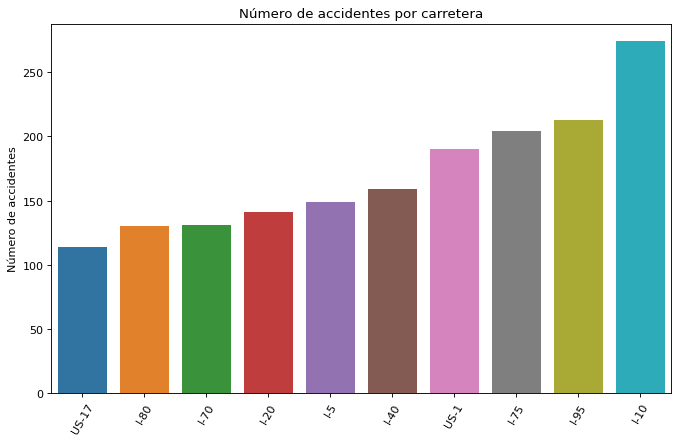

In [59]:
figure(figsize=(10, 6), dpi=80)

sns.barplot(data = df_carretera[15668:], x = 'trafficway_identifier', y = 'contador')
plt.ylabel('Número de accidentes')
plt.xlabel('')
plt.xticks(rotation=60)
plt.title('Número de accidentes por carretera')

Se logra identificar que la carretera con mayor número de accidentes es la carretera 'I-10'.

## Pregunta 3: Realizar un análisis mensual de accidentes por estado

In [60]:
df_meses = df1.groupby(['month_of_crash'],group_keys=True, as_index=False).apply(lambda x: x)
df_meses

state_number      state_name  consecutive_number  \
0  7                42    Pennsylvania              420702   
   21               42    Pennsylvania              420704   
   23               26        Michigan              260911   
   74                6      California               60020   
   77               42    Pennsylvania              420363   
...                ...             ...                 ...   
11 32493            48           Texas              482885   
   32498            37  North Carolina              371229   
   32518            51        Virginia              510689   
   32522            29        Missouri              290819   
   32524             6      California               62748   

          number_of_vehicle_forms_submitted_all  \
0  7                                          9   
   21                                        22   
   23                                        58   
   74                                         5   
   77                                         6   
...                                         ...   
11 32493                                      4   
   32498                                      4   
   32518                                      4   
   32522                                      4   
   32524                                      5   

          number_of_motor_vehicles_in_transport_mvit  \
0  7                                               9   
   21                                             18   
   23                                             58   
   74                                              5   
   77                                              6   
...                                              ...   
11 32493                                           4   
   32498                                           4   
   32518                                           4   
   32522                                           4   
   32524                                           4   

          number_of_parked_working_vehicles  \
0  7                                      0   
   21                                     4   
   23                                     0   
   74                                     0   
   77                                     0   
...                                     ...   
11 32493                                  0   
   32498                                  0   
   32518                                  0   
   32522                                  0   
   32524                                  1   

          number_of_forms_submitted_for_persons_not_in_motor_vehicles  \
0  7                                                      0             
   21                                                     4             
   23                                                     0             
   74                                                     0             
   77                                                     0             
...                                                     ...             
11 32493                                                  0             
   32498                                                  0             
   32518                                                  0             
   32522                                                  1             
   32524                                                  0             

          number_of_persons_not_in_motor_vehicles_in_transport_mvit  \
0  7                                                      0           
   21                                                     4           
   23                                                     0           
   74                                                     0           
   77                                                     0           
...                                                     ...           
11 32493                                

In [61]:
df33 = df_meses[ df_meses['month_of_crash'] == 12]
df34 = df33.groupby(['state_name'],group_keys=True, as_index=False).apply(lambda x: x)
df33

state_number      state_name  consecutive_number  \
11 18               53      Washington              530505   
   24               35      New Mexico              350271   
   45               35      New Mexico              350272   
   61               49            Utah              490250   
   70               12         Florida              122470   
...                ...             ...                 ...   
   32493            48           Texas              482885   
   32498            37  North Carolina              371229   
   32518            51        Virginia              510689   
   32522            29        Missouri              290819   
   32524             6      California               62748   

          number_of_vehicle_forms_submitted_all  \
11 18                                         5   
   24                                         5   
   45                                         5   
   61                                         5   
   70                                         5   
...                                         ...   
   32493                                      4   
   32498                                      4   
   32518                                      4   
   32522                                      4   
   32524                                      5   

          number_of_motor_vehicles_in_transport_mvit  \
11 18                                              5   
   24                                              5   
   45                                              5   
   61                                              5   
   70                                              5   
...                                              ...   
   32493                                           4   
   32498                                           4   
   32518                                           4   
   32522                                           4   
   32524                                           4   

          number_of_parked_working_vehicles  \
11 18                                     0   
   24                                     0   
   45                                     0   
   61                                     0   
   70                                     0   
...                                     ...   
   32493                                  0   
   32498                                  0   
   32518                                  0   
   32522                                  0   
   32524                                  1   

          number_of_forms_submitted_for_persons_not_in_motor_vehicles  \
11 18                                                     0             
   24                                                     0             
   45                                                     0             
   61                                                     0             
   70                                                     0             
...                                                     ...             
   32493                                                  0             
   32498                                                  0             
   32518                                                  0             
   32522                                                  1             
   32524                                                  0             

          number_of_persons_not_in_motor_vehicles_in_transport_mvit  \
11 18                                                     0           
   24                                                     0           
   45                                                     0           
   61                                                     0           
   70                                                     0           
...                                                     ...           
   32493                                

In [62]:
lista_df_por_meses = []
for i in range(12):
    dfmes = df_meses[ df_meses['month_of_crash'] == i+1]
    lista_df_por_meses.append(dfmes)

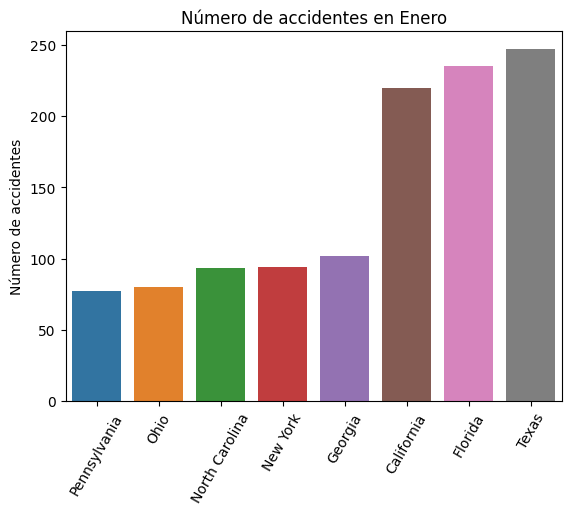

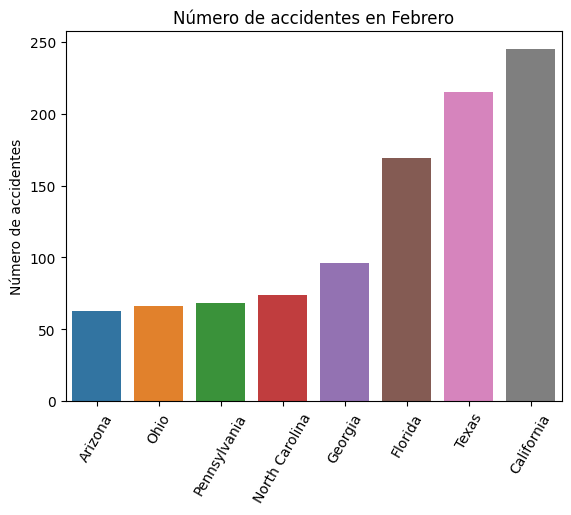

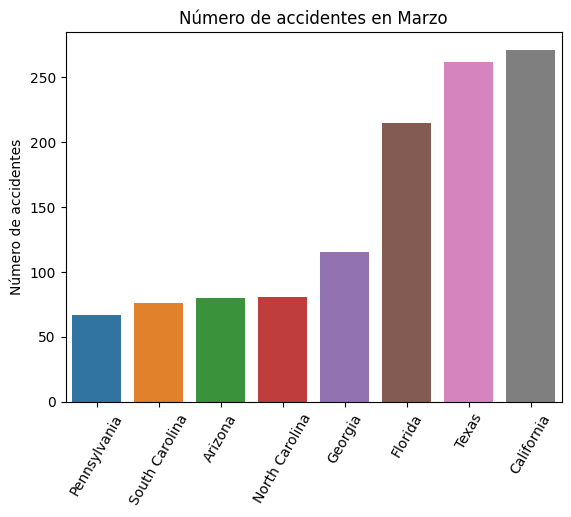

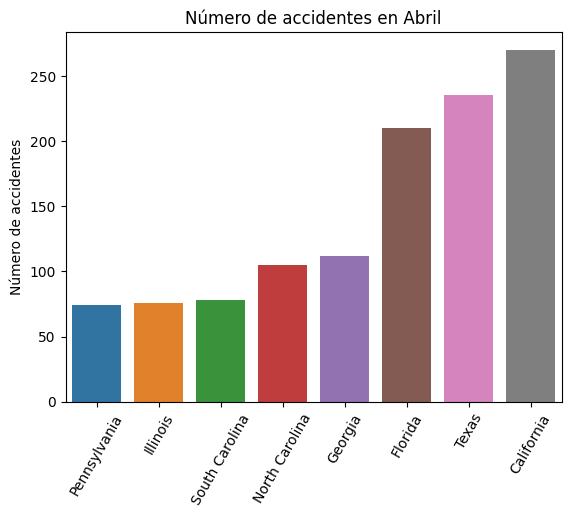

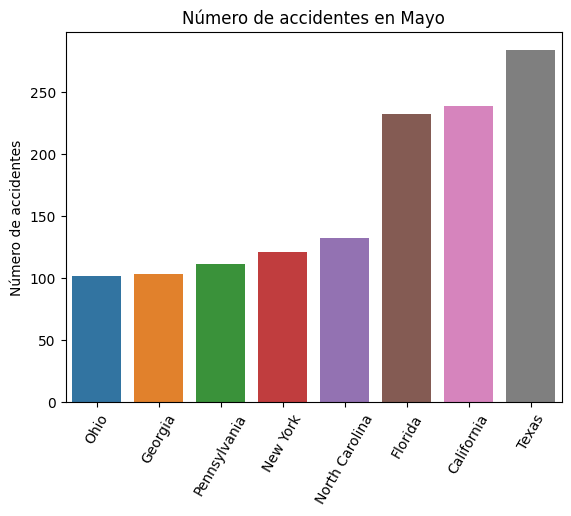

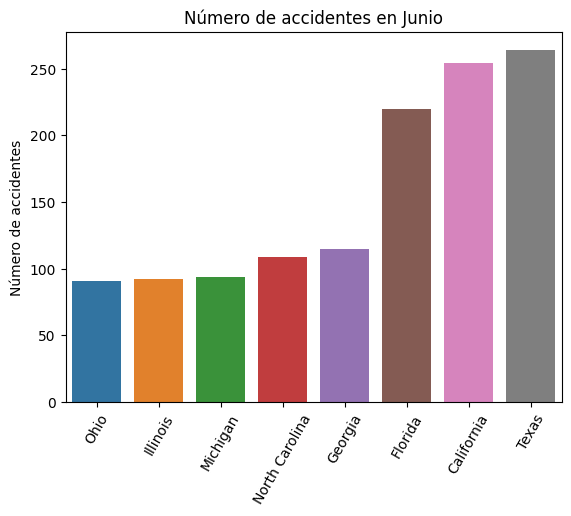

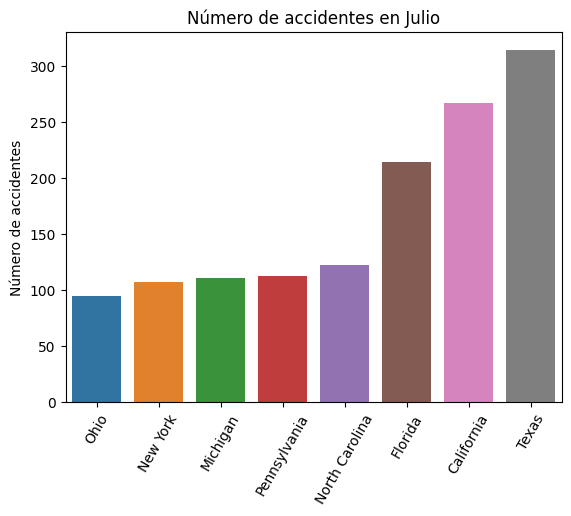

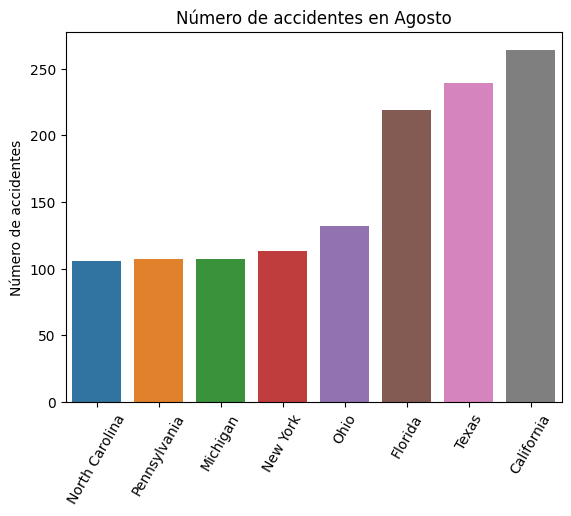

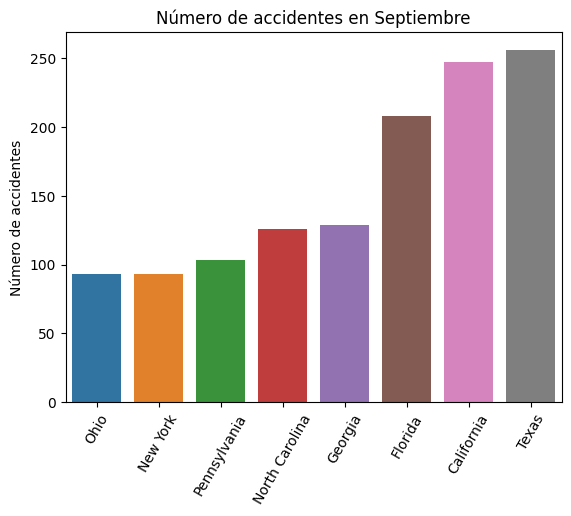

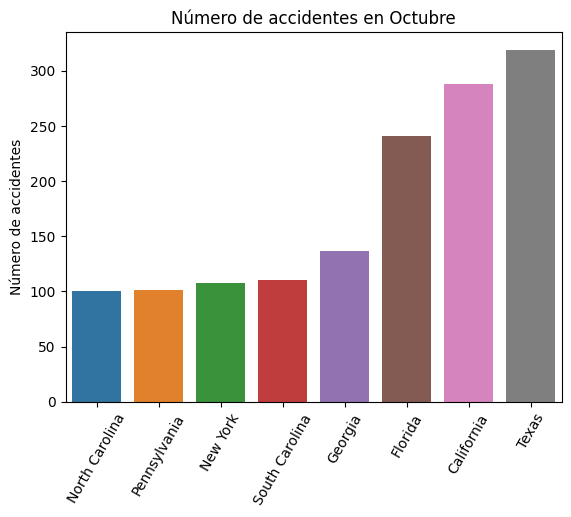

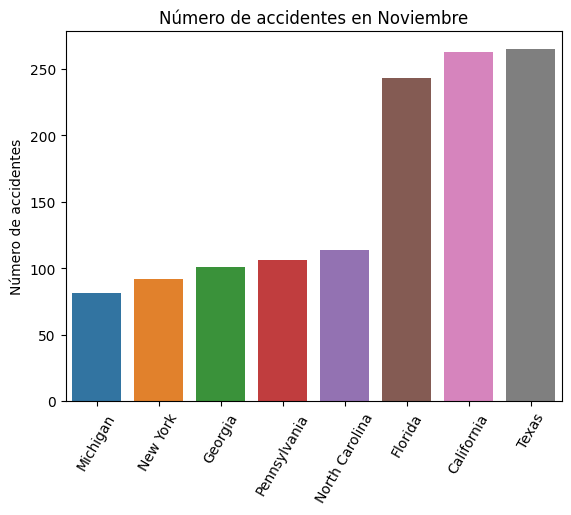

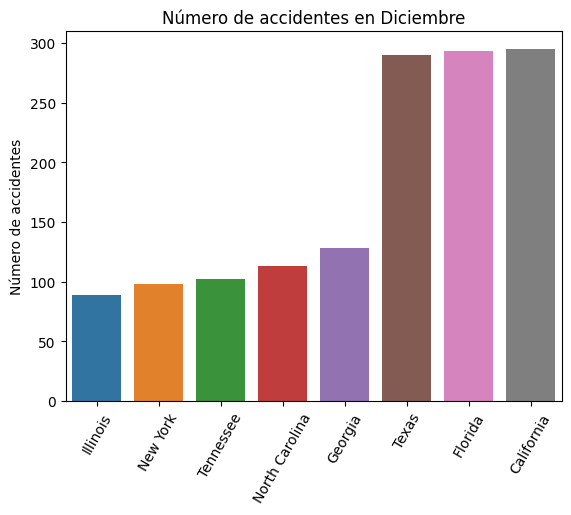

In [63]:
nombre_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
j = 0
for dataf in lista_df_por_meses:
    df_mes = dataf.groupby(['state_name'], as_index=False).sum().sort_values(['contador'])
    sns.barplot(data = df_mes[-8:], x = 'state_name', y = 'contador')
    plt.ylabel('Número de accidentes')
    plt.xlabel('')
    plt.xticks(rotation=60)
    plt.title(f'Número de accidentes en {nombre_meses[j]}')
    j += 1
    plt.show()



También es útil utilizar un gráfico de líneas para poder visualizar cómo va cambiando cada estado al pasar los meses

In [64]:
df1['month_of_crash'].describe()


count     32538.0
mean     6.812588
std      3.357216
min           1.0
25%           4.0
50%           7.0
75%          10.0
max          12.0
Name: month_of_crash, dtype: Float64

In [65]:
estados_interes = ['Florida', 'Texas', 'Georgia', 'North Carolina', 'Pennsylvania', 'Tennessee', 'New York', 'Ohio', 'California']

In [66]:
df2 = df1.groupby(['state_name', 'month_of_crash']).size().reset_index(name = 'contador')
df_pivot = df2.pivot(index='month_of_crash', columns='state_name', values='contador')
df_pivot

state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
month_of_crash,,,,,,,,,,,,,,,,,,,,,
1,50.0,2.0,65.0,29.0,220.0,42.0,15.0,9.0,1.0,235.0,...,7.0,63.0,247.0,14.0,3.0,39.0,38.0,17.0,33.0,9.0
2,37.0,2.0,63.0,41.0,245.0,32.0,17.0,7.0,1.0,169.0,...,3.0,49.0,215.0,15.0,NaN,52.0,26.0,14.0,22.0,4.0
3,59.0,4.0,80.0,40.0,271.0,35.0,15.0,8.0,1.0,215.0,...,8.0,65.0,262.0,22.0,NaN,49.0,40.0,19.0,38.0,7.0
4,69.0,7.0,57.0,32.0,270.0,47.0,19.0,3.0,2.0,210.0,...,7.0,63.0,235.0,16.0,3.0,55.0,26.0,24.0,46.0,13.0
5,72.0,7.0,77.0,36.0,239.0,39.0,28.0,10.0,NaN,232.0,...,9.0,80.0,284.0,26.0,4.0,71.0,33.0,21.0,53.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,75.0,4.0,65.0,53.0,264.0,45.0,28.0,12.0,1.0,219.0,...,21.0,98.0,239.0,27.0,5.0,63.0,53.0,32.0,58.0,18.0
9,72.0,4.0,59.0,40.0,247.0,71.0,24.0,14.0,2.0,208.0,...,11.0,80.0,256.0,16.0,7.0,78.0,65.0,17.0,63.0,8.0
10,83.0,6.0,72.0,47.0,288.0,45.0,29.0,16.0,3.0,241.0,...,7.0,81.0,319.0,23.0,5.0,59.0,41.0,26.0,44.0,10.0


In [67]:
df_pivot['California'].sum()

3123.0

In [68]:
df_filtrado = df_pivot.loc[:, estados_interes]
df_filtrado

state_name,Florida,Texas,Georgia,North Carolina,Pennsylvania,Tennessee,New York,Ohio,California
month_of_crash,,,,,,,,,
1,235.0,247.0,102.0,93.0,77.0,63.0,94.0,80.0,220.0
2,169.0,215.0,96.0,74.0,68.0,49.0,43.0,66.0,245.0
3,215.0,262.0,115.0,81.0,67.0,65.0,47.0,50.0,271.0
4,210.0,235.0,112.0,105.0,74.0,63.0,70.0,60.0,270.0
5,232.0,284.0,103.0,132.0,111.0,80.0,121.0,102.0,239.0
...,...,...,...,...,...,...,...,...,...
8,219.0,239.0,96.0,106.0,107.0,98.0,113.0,132.0,264.0
9,208.0,256.0,129.0,126.0,103.0,80.0,93.0,93.0,247.0
10,241.0,319.0,137.0,100.0,101.0,81.0,108.0,100.0,288.0


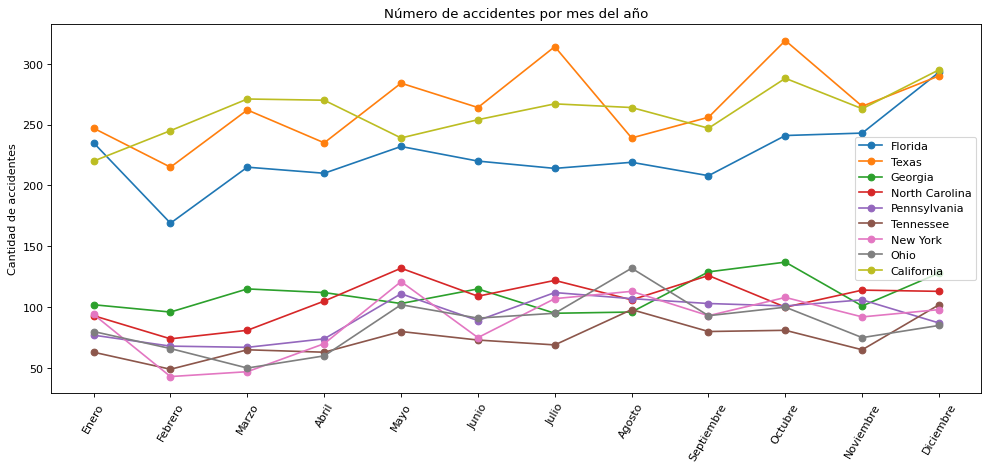

In [69]:
figure(figsize=(15, 6), dpi=80)
for estado in estados_interes:
    plt.plot(nombre_meses,df_filtrado[estado],'o-', label = estado)
    plt.ylabel('Cantidad de accidentes')
    plt.title('Número de accidentes por mes del año')
    plt.xticks(rotation=60)
    plt.legend()



Se puede apreeciar que Florida, California y Texas concentran la mayor parte de los accidentes durante todos los meses del año. Curiosamente en Diciembre estos 3 estados suelen tener una cantidad de accidentes muy similar.

## Pregunta 4: Realizar un análisis según la hora del dia

Se exploran los datos de la columna 'hour_of_crash'

In [70]:
df1['hour_of_crash']

0        14
1        11
2        12
3        16
4        18
         ..
32533    14
32534    22
32535     6
32536     7
32537    13
Name: hour_of_crash, Length: 32538, dtype: Int64

In [71]:
df1['hour_of_crash'].describe()

count      32538.0
mean     13.450181
std      10.173214
min            0.0
25%            7.0
50%           14.0
75%           19.0
max           99.0
Name: hour_of_crash, dtype: Float64

In [72]:
df1[ df1['hour_of_crash'] == 99]

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,contador
210,41,Oregon,410312,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-11-14 00:00:00+00:00,1
211,26,Michigan,260865,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-12-24 00:00:00+00:00,1
231,22,Louisiana,220726,1,1,0,0,0,2,2,...,18,Date of Crash and Date of EMS Notification Wer...,0,None,0,None,1,0,2015-04-02 00:00:00+00:00,1
336,41,Oregon,410410,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-12-16 00:00:00+00:00,1
337,41,Oregon,410373,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,1,2015-05-04 00:00:00+00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30376,4,Arizona,40745,2,2,0,0,0,3,3,...,0,None,0,None,0,None,1,0,2015-11-02 00:00:00+00:00,1
30391,4,Arizona,40616,2,2,0,0,0,3,3,...,0,None,0,None,0,None,1,0,2015-04-22 00:00:00+00:00,1
30601,25,Massachusetts,250108,3,3,0,0,0,3,3,...,0,None,0,None,0,None,1,0,2015-06-15 00:00:00+00:00,1
31139,42,Pennsylvania,420563,3,3,0,0,0,5,5,...,0,None,0,None,0,None,1,0,2015-04-19 00:00:00+00:00,1


Se logra notar que las filas que tienen el valor '99' en la columna 'hour_of_crash', son aquellos que no tienen especificada la hora a la cual se registró el accidente.

In [73]:
hora = [x for x in range(24)]
hora

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [74]:
estados_interes

['Florida',
 'Texas',
 'Georgia',
 'North Carolina',
 'Pennsylvania',
 'Tennessee',
 'New York',
 'Ohio',
 'California']

In [75]:
df_accidentes = df1.groupby('hour_of_crash')
df_accidentes = df_accidentes['contador'].sum().reset_index()
df_accidentes.drop(24, inplace = True)
df_accidentes

,hour_of_crash,contador
0,0,1266
1,1,1227
2,2,1207
3,3,946
4,4,751
...,...,...
19,19,1783
20,20,1861
21,21,1810
22,22,1555


Text(0.5, 1.0, 'Accídentes según hora del día durante el año 2015')

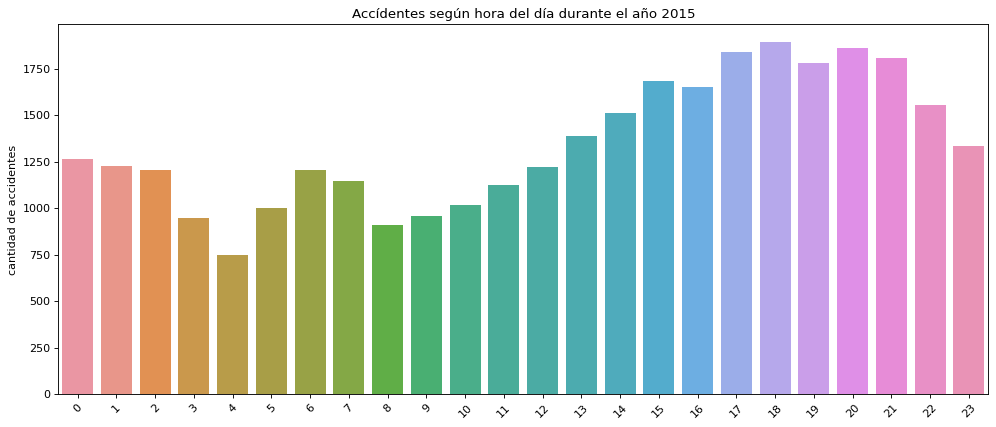

In [76]:
figure(figsize=(15, 6), dpi=80)


sns.barplot(data = df_accidentes, x = 'hour_of_crash', y = 'contador')

plt.ylabel('cantidad de accidentes')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Accídentes según hora del día durante el año 2015')

Se puede notar un peak importante entre las 17:00 y las 21:00. El cual podría deberse a que en ese horario las personas suelen regresar a sus casas luego de la jornada laboral, por lo tanto hay mucho tráfico y personas cansadas. Además, la luz disminuye a esas horas, por lo cual es más fácil que los conductores no vean alguna señal de tránsito, a otros vehículos o peatones.

In [77]:
df3 = df1.groupby(['state_name', 'hour_of_crash']).size().reset_index(name = 'contador')
df_pivot2 = df3.pivot(index='hour_of_crash', columns='state_name', values='contador')
df_pivot2

state_name,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
hour_of_crash,,,,,,,,,,,,,,,,,,,,,
0,30.0,5.0,21.0,20.0,129.0,16.0,16.0,8.0,NaN,115.0,...,2.0,33.0,149.0,7.0,1.0,25.0,19.0,9.0,23.0,5.0
1,27.0,3.0,33.0,15.0,121.0,30.0,15.0,11.0,2.0,103.0,...,4.0,27.0,159.0,5.0,NaN,32.0,22.0,7.0,20.0,NaN
2,30.0,2.0,24.0,12.0,136.0,17.0,12.0,7.0,1.0,105.0,...,3.0,22.0,179.0,5.0,2.0,34.0,15.0,7.0,20.0,3.0
3,22.0,NaN,18.0,8.0,94.0,6.0,9.0,3.0,2.0,97.0,...,2.0,26.0,89.0,7.0,NaN,21.0,11.0,12.0,13.0,6.0
4,24.0,2.0,18.0,13.0,93.0,8.0,7.0,4.0,NaN,73.0,...,3.0,16.0,89.0,5.0,NaN,12.0,8.0,9.0,8.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,47.0,3.0,54.0,28.0,208.0,33.0,10.0,8.0,2.0,201.0,...,7.0,51.0,179.0,10.0,3.0,34.0,20.0,17.0,24.0,6.0
21,42.0,6.0,37.0,22.0,187.0,21.0,13.0,8.0,1.0,180.0,...,1.0,41.0,196.0,14.0,2.0,41.0,19.0,8.0,23.0,4.0
22,34.0,1.0,42.0,17.0,159.0,16.0,18.0,9.0,1.0,156.0,...,NaN,46.0,164.0,9.0,2.0,36.0,17.0,5.0,22.0,7.0


In [78]:
df_filtrado2 = df_pivot2.loc[:, estados_interes]
df_filtrado2

state_name,Florida,Texas,Georgia,North Carolina,Pennsylvania,Tennessee,New York,Ohio,California
hour_of_crash,,,,,,,,,
0,115.0,149.0,51.0,44.0,36.0,33.0,40.0,42.0,129.0
1,103.0,159.0,42.0,45.0,35.0,27.0,42.0,31.0,121.0
2,105.0,179.0,41.0,40.0,48.0,22.0,27.0,44.0,136.0
3,97.0,89.0,39.0,39.0,38.0,26.0,30.0,40.0,94.0
4,73.0,89.0,31.0,22.0,20.0,16.0,23.0,23.0,93.0
...,...,...,...,...,...,...,...,...,...
20,201.0,179.0,63.0,67.0,67.0,51.0,52.0,52.0,208.0
21,180.0,196.0,86.0,78.0,56.0,41.0,57.0,58.0,187.0
22,156.0,164.0,64.0,48.0,60.0,46.0,47.0,45.0,159.0


In [79]:
df_filtrado2.drop(99, inplace=True)
df_filtrado2


state_name,Florida,Texas,Georgia,North Carolina,Pennsylvania,Tennessee,New York,Ohio,California
hour_of_crash,,,,,,,,,
0,115.0,149.0,51.0,44.0,36.0,33.0,40.0,42.0,129.0
1,103.0,159.0,42.0,45.0,35.0,27.0,42.0,31.0,121.0
2,105.0,179.0,41.0,40.0,48.0,22.0,27.0,44.0,136.0
3,97.0,89.0,39.0,39.0,38.0,26.0,30.0,40.0,94.0
4,73.0,89.0,31.0,22.0,20.0,16.0,23.0,23.0,93.0
...,...,...,...,...,...,...,...,...,...
19,167.0,166.0,81.0,81.0,59.0,35.0,68.0,45.0,171.0
20,201.0,179.0,63.0,67.0,67.0,51.0,52.0,52.0,208.0
21,180.0,196.0,86.0,78.0,56.0,41.0,57.0,58.0,187.0


In [80]:
if df_filtrado2.isna().any().any():
    print("Hay datos faltantes en el dataframe")
else:
    print("No hay datos faltantes en el dataframe")


No hay datos faltantes en el dataframe


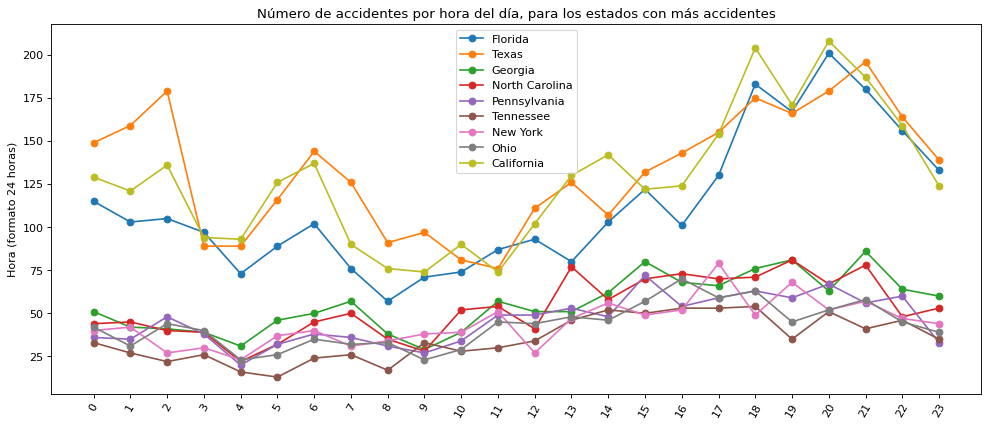

In [81]:
figure(figsize=(15, 6), dpi=80)

horas = [x for x in range(24)]

for estado in estados_interes:
    plt.plot(horas,df_filtrado2[estado],'o-', label = estado)
    plt.ylabel('Cantidad de accidentes')
    plt.ylabel('Hora (formato 24 horas)')
    plt.xticks(horas)
    plt.title('Número de accidentes por hora del día, para los estados con más accidentes')
    plt.xticks(rotation=60)
    plt.legend()


Todos los estados parecen sseguir la estructura del gráfico anterior( 'Número de accidentes por hora del día' ).

## Pregunta 5: Realizar un análisis resaltando la razón entre números de accidentes y conductores ebrios

In [82]:
df5 = df1.groupby(['state_name'], as_index = False).sum()
df5 = df5.loc[:, ['state_name','contador', 'number_of_drunk_drivers']]
df5

,state_name,contador,number_of_drunk_drivers
0,Alabama,784,221
1,Alaska,60,24
2,Arizona,811,242
3,Arkansas,491,142
4,California,3123,1005
...,...,...,...
46,Virginia,712,223
47,Washington,499,163
48,West Virginia,246,70
49,Wisconsin,523,185


In [83]:
df5['razón_accidentes_vs_ebrios'] = df5['number_of_drunk_drivers'] / df5['contador']

In [84]:
df5sorted = df5.sort_values('razón_accidentes_vs_ebrios')
df5sorted

,state_name,contador,number_of_drunk_drivers,razón_accidentes_vs_ebrios
44,Utah,258,44,0.170543
30,New Jersey,521,95,0.182342
14,Indiana,752,147,0.195479
24,Mississippi,604,127,0.210265
32,New York,1061,224,0.211122
...,...,...,...,...
50,Wyoming,129,54,0.418605
39,Rhode Island,41,18,0.439024
26,Montana,204,91,0.446078
34,North Dakota,111,51,0.459459


En cuanto a los estados, se puede observar que Maine es donde esta relación es mayor, con un 50% de los accidentes que involucran conductores ebrios presentes

In [85]:
df5sorted[-10:]

,state_name,contador,number_of_drunk_drivers,razón_accidentes_vs_ebrios
12,Idaho,198,72,0.363636
18,Louisiana,698,256,0.366762
37,Oregon,411,156,0.379562
6,Connecticut,257,98,0.381323
1,Alaska,60,24,0.4
50,Wyoming,129,54,0.418605
39,Rhode Island,41,18,0.439024
26,Montana,204,91,0.446078
34,North Dakota,111,51,0.459459
19,Maine,144,72,0.5


A continuación se presentan los estados donde esta proporción es mayor

Text(0.5, 1.0, 'Razon (accidentes / conductores ebrios) por estado')

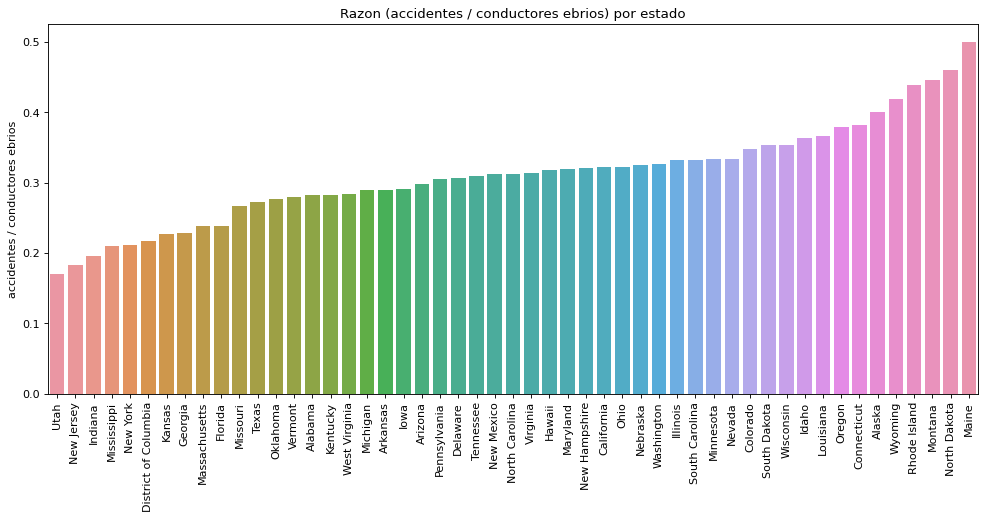

In [86]:
figure(figsize=(15, 6), dpi=80)


sns.barplot(data = df5sorted, x = 'state_name', y = 'razón_accidentes_vs_ebrios')
plt.ylabel('accidentes / conductores ebrios')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Razon (accidentes / conductores ebrios) por estado')

In [87]:
df1['number_of_drunk_drivers'].sum()

9479

Si lo gráficamos en un mapa de calor de Estados Unidos, tal vez pueda entregar información útil sobre el uso de alcohol, accidentes de tránsito y el lugar geográfico en el cual sucede el accidente

In [117]:
states = geopandas.read_file('datosmapa/USA_States.shp')
states

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
...,...,...,...,...
46,Louisiana,22,LA,"MULTIPOLYGON (((-93.70752 30.23958, -93.69938 ..."
47,Florida,12,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ..."
48,Michigan,26,MI,"MULTIPOLYGON (((-88.49753 48.17380, -88.62533 ..."
49,Hawaii,15,HI,"MULTIPOLYGON (((-159.33797 21.95150, -159.4423..."


In [118]:
states.rename(columns={'STATE_NAME': 'state_name'}, inplace=True)

In [119]:
dfstates = pd.merge(states, df5sorted, on = 'state_name')
dfstates

,state_name,STATE_FIPS,STATE_ABBR,geometry,contador,number_of_drunk_drivers,razón_accidentes_vs_ebrios
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",499,163,0.326653
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",204,91,0.446078
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",144,72,0.5
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",111,51,0.459459
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",116,41,0.353448
...,...,...,...,...,...,...,...
46,Louisiana,22,LA,"MULTIPOLYGON (((-93.70752 30.23958, -93.69938 ...",698,256,0.366762
47,Florida,12,FL,"MULTIPOLYGON (((-80.78566 28.78519, -80.76242 ...",2699,644,0.238607
48,Michigan,26,MI,"MULTIPOLYGON (((-88.49753 48.17380, -88.62533 ...",896,259,0.289062
49,Hawaii,15,HI,"MULTIPOLYGON (((-159.33797 21.95150, -159.4423...",85,27,0.317647


In [120]:
states = dfstates.to_crs("EPSG:3395")

In [121]:
states.dtypes

state_name                      object
STATE_FIPS                      object
STATE_ABBR                      object
geometry                      geometry
contador                         int64
number_of_drunk_drivers          Int64
razón_accidentes_vs_ebrios     Float64
dtype: object

In [122]:
states.sort_values(['number_of_drunk_drivers'])

,state_name,STATE_FIPS,STATE_ABBR,geometry,contador,number_of_drunk_drivers,razón_accidentes_vs_ebrios
26,District of Columbia,11,DC,"POLYGON ((-8572483.637 4690023.109, -8561682.7...",23,5,0.217391
8,Vermont,50,VT,"POLYGON ((-8155049.917 5244388.009, -8156298.4...",50,14,0.28
18,Rhode Island,44,RI,"MULTIPOLYGON (((-7991647.863 5073066.218, -799...",41,18,0.439024
50,Alaska,02,AK,"MULTIPOLYGON (((-17959594.811 8086397.632, -17...",60,24,0.4
49,Hawaii,15,HI,"MULTIPOLYGON (((-17737421.341 2489736.698, -17...",85,27,0.317647
...,...,...,...,...,...,...,...
16,Pennsylvania,42,PA,"POLYGON ((-8624565.870 4797971.893, -8693601.1...",1102,336,0.3049
37,North Carolina,37,NC,"MULTIPOLYGON (((-9349551.960 4137905.271, -936...",1275,399,0.312941
47,Florida,12,FL,"MULTIPOLYGON (((-8993018.803 3327763.616, -899...",2699,644,0.238607
39,Texas,48,TX,"MULTIPOLYGON (((-11799742.102 3661760.607, -11...",3190,871,0.273041


Float64


<Axes: >

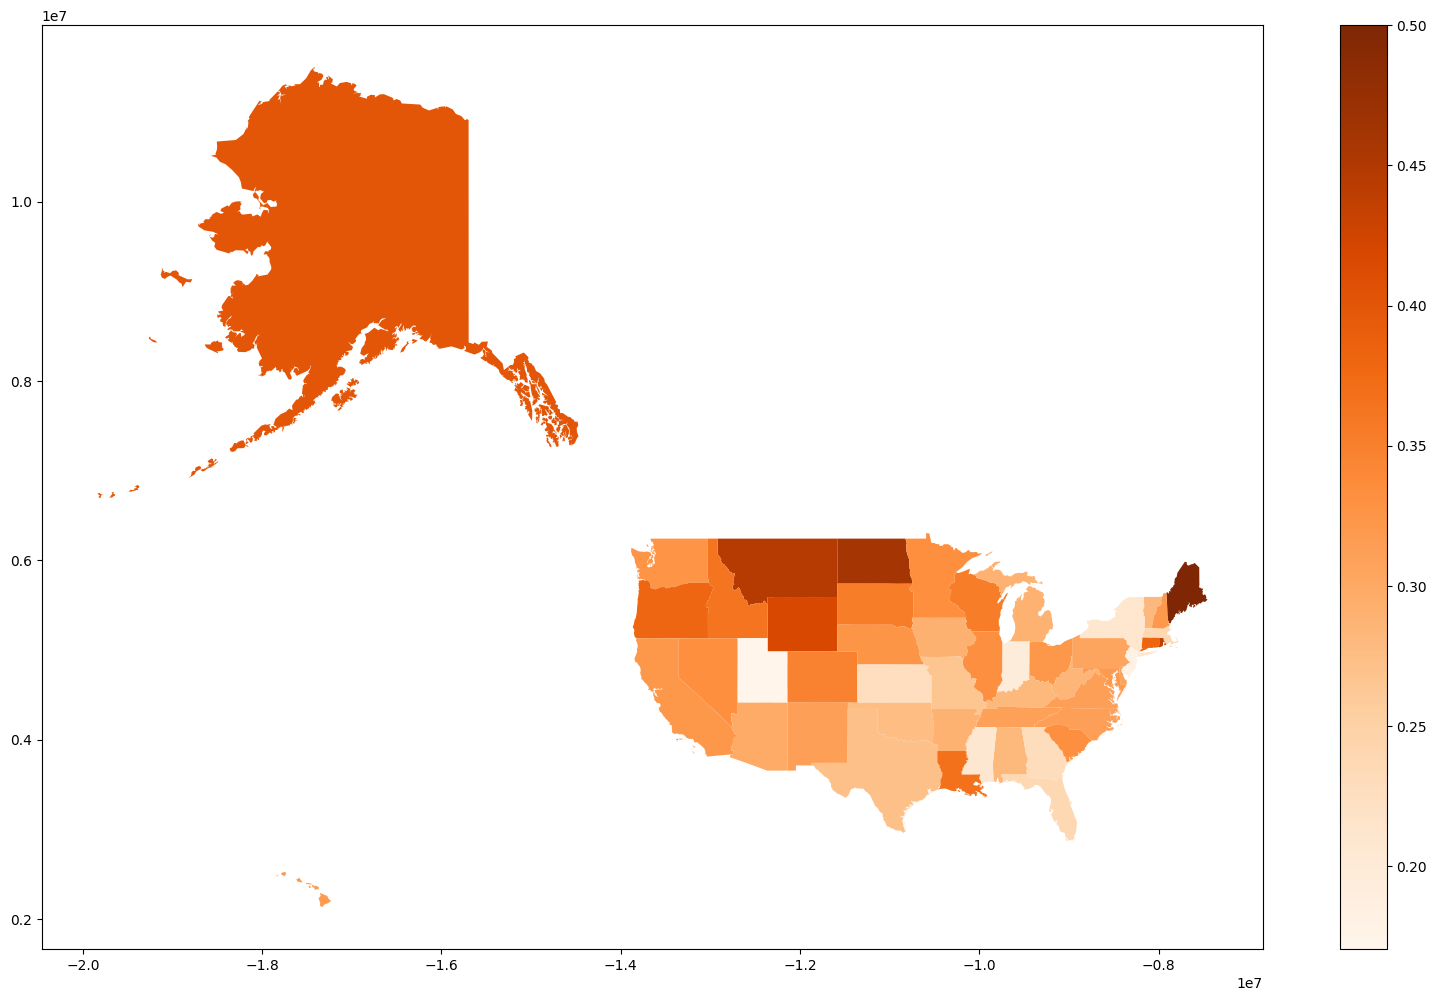

In [123]:
# Check the data type of the column
print(states['razón_accidentes_vs_ebrios'].dtype)

# Convert the column to float
states['razón_accidentes_vs_ebrios'] = states['razón_accidentes_vs_ebrios'].astype(float)

# Plot the data
states.plot(column='razón_accidentes_vs_ebrios', cmap='Oranges', figsize=(20, 12), legend=True)


In [124]:
states.drop([50], inplace = True)
states.drop([49], inplace = True)

Text(0.5, 1.0, 'Mapa de calor , razón entre conductores ebrios y accidentes')

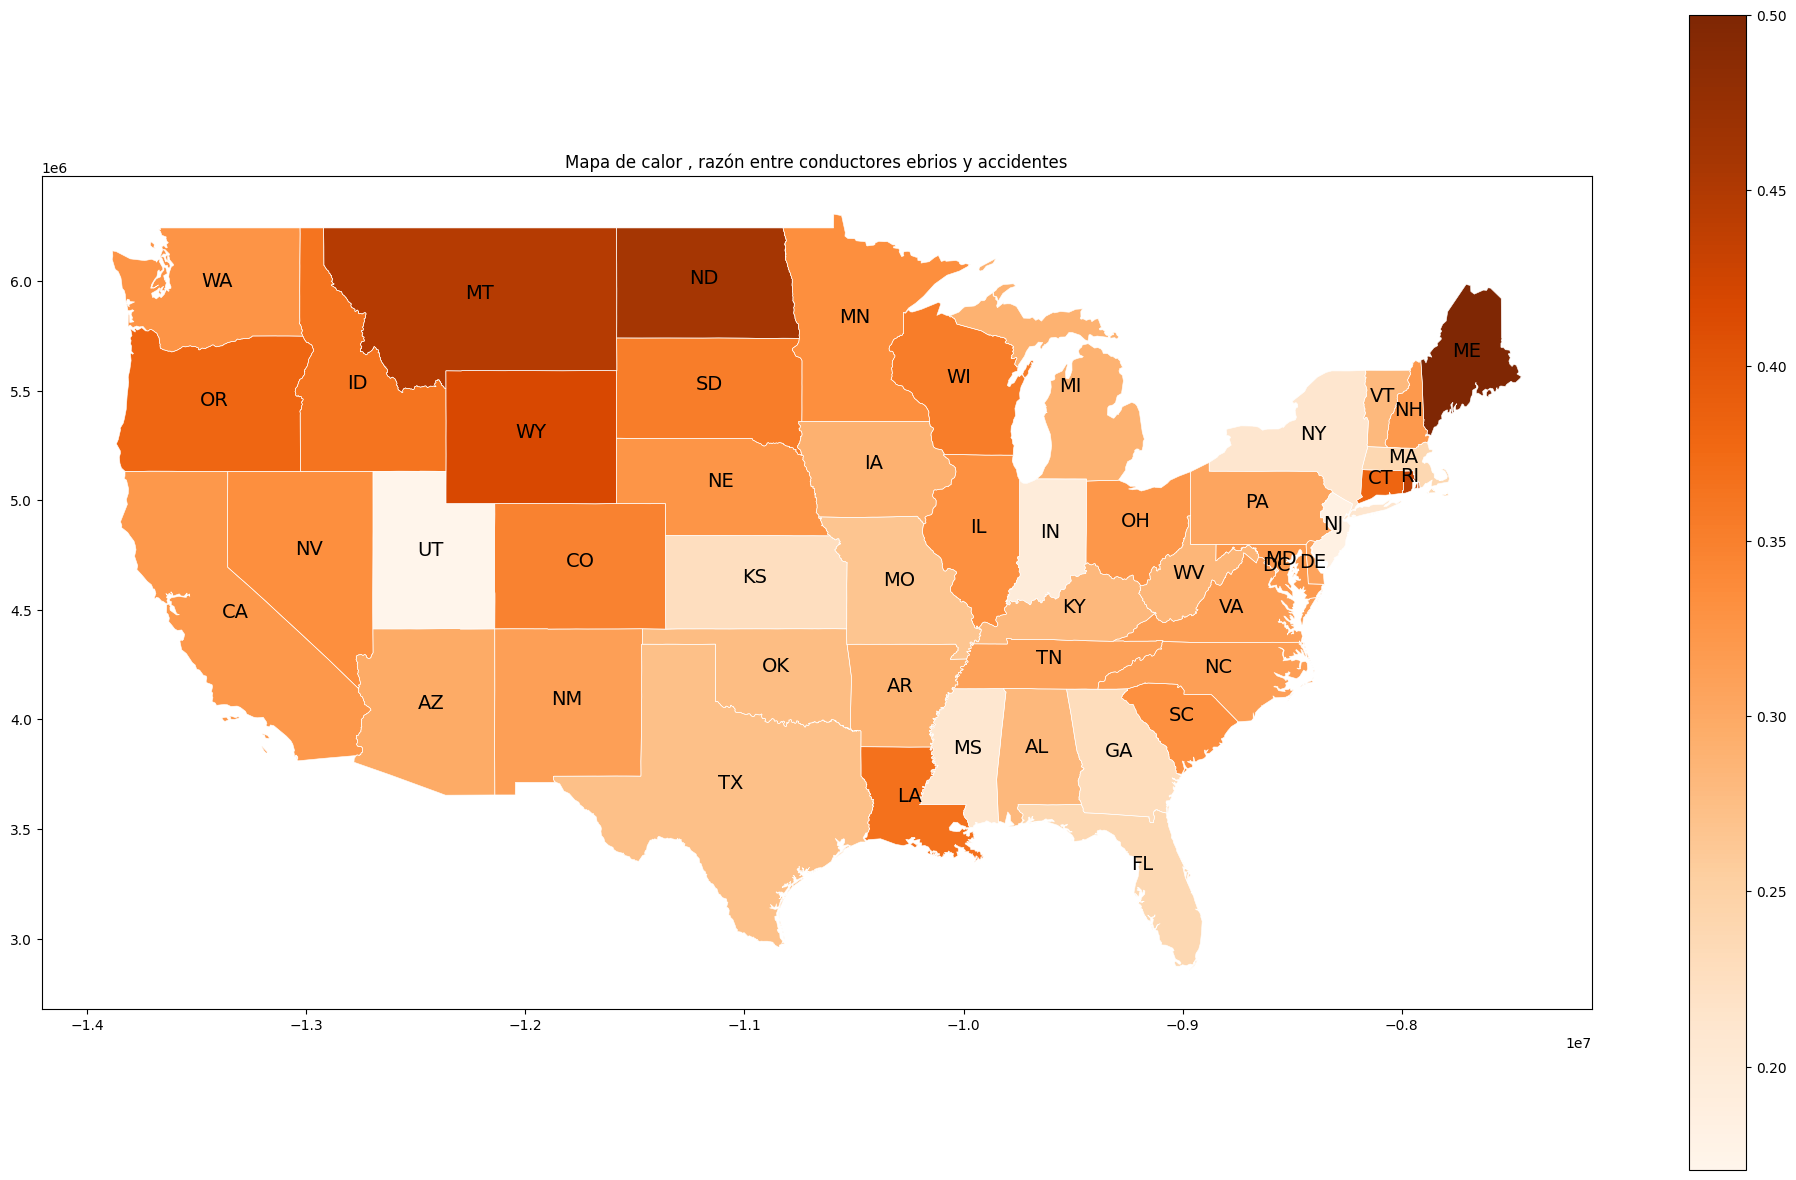

In [126]:
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
states.apply(lambda x: ax.annotate(text=x.STATE_ABBR , xy=x.geometry.centroid.coords[0], ha='center', fontsize=14, color = 'black'),axis=1);
states.boundary.plot(ax=ax, color='White', linewidth=.4)
states.plot(ax=ax, column = 'razón_accidentes_vs_ebrios', cmap='Oranges', figsize=(20, 12), legend = True)
plt.title('Mapa de calor , razón entre conductores ebrios y accidentes')

Se puede notar que los estados del norte tienen una mayor relación entre accidentes y conductores ebrios.

También, puede ser interesante analizar que sucede con esta razón dado una hora del día en específico:

In [101]:
df_ebrios = df1.groupby('hour_of_crash')
df_ebrios = df_ebrios['number_of_drunk_drivers'].sum().reset_index()
df_ebrios.drop(24, inplace = True)
df_ebrios

,hour_of_crash,number_of_drunk_drivers
0,0,677
1,1,757
2,2,794
3,3,546
4,4,326
...,...,...
19,19,564
20,20,604
21,21,659
22,22,632


In [102]:
df_accidentes = df1.groupby('hour_of_crash')
df_accidentes = df_accidentes['contador'].sum().reset_index()
df_accidentes.drop(24, inplace = True)
df_accidentes

,hour_of_crash,contador
0,0,1266
1,1,1227
2,2,1207
3,3,946
4,4,751
...,...,...
19,19,1783
20,20,1861
21,21,1810
22,22,1555


In [103]:
df_ebrios_horas = pd.merge(df_ebrios, df_accidentes, on = 'hour_of_crash')

In [104]:
df_ebrios_horas

,hour_of_crash,number_of_drunk_drivers,contador
0,0,677,1266
1,1,757,1227
2,2,794,1207
3,3,546,946
4,4,326,751
...,...,...,...
19,19,564,1783
20,20,604,1861
21,21,659,1810
22,22,632,1555


In [105]:
df_ebrios_horas['razon'] = df_ebrios_horas['number_of_drunk_drivers'] / df_ebrios_horas['contador']

Text(0.5, 1.0, 'Razón (accidentes/conductores ebrios) para cada hora del día durante el año 2015')

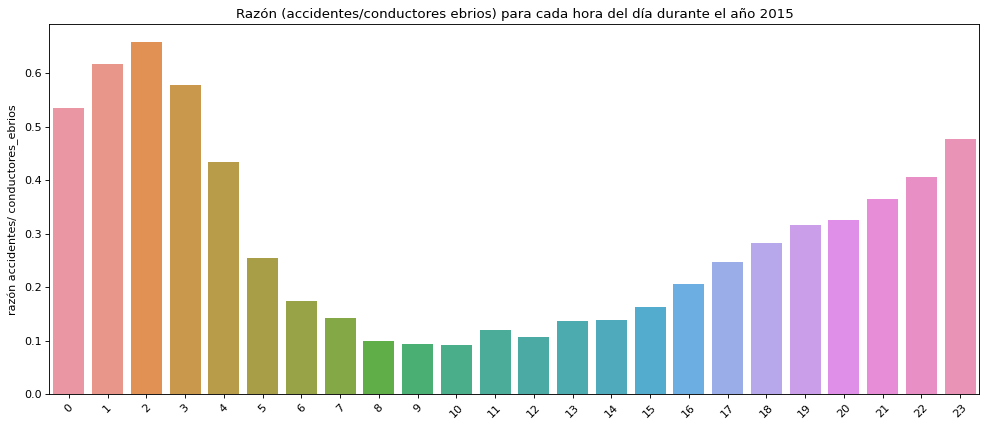

In [106]:
figure(figsize=(15, 6), dpi=80)


sns.barplot(data = df_ebrios_horas, x = 'hour_of_crash', y = 'razon')

plt.ylabel('razón accidentes/ conductores_ebrios')
plt.xlabel('')
plt.xticks(rotation=45)
plt.title('Razón (accidentes/conductores ebrios) para cada hora del día durante el año 2015')

Se puede notar que la razón de 'accidentes / conductores ebrios' es mayor en las horas de la noche y madrugada, esto tal vez podrás explicarse a que a esas horas la gente suele ir a fiestas o volver a sus casas luego de una fiesta, donde es común consumir bebidas alcohólicas.

Orientándose a esta suposición, también puede ser interesante estudia que ocurre con esta razón para cada día de la semana:

In [107]:
df_ebrios = df1.groupby('day_of_week')
df_ebrios = df_ebrios['number_of_drunk_drivers'].sum().reset_index()
df_ebrios

,day_of_week,number_of_drunk_drivers
0,1,2208
1,2,813
2,3,841
3,4,897
4,5,1071
5,6,1369
6,7,2280


In [108]:
df_accidentes = df1.groupby('day_of_week')
df_accidentes = df_accidentes['contador'].sum().reset_index()
df_accidentes

,day_of_week,contador
0,1,5298
1,2,4038
2,3,3985
3,4,4182
4,5,4460
5,6,4916
6,7,5659


In [109]:
df_ebrios_dias = pd.merge(df_ebrios, df_accidentes, on = 'day_of_week')

In [110]:
df_ebrios_dias['razon'] = df_ebrios_dias['number_of_drunk_drivers'] / df_ebrios_horas['contador']

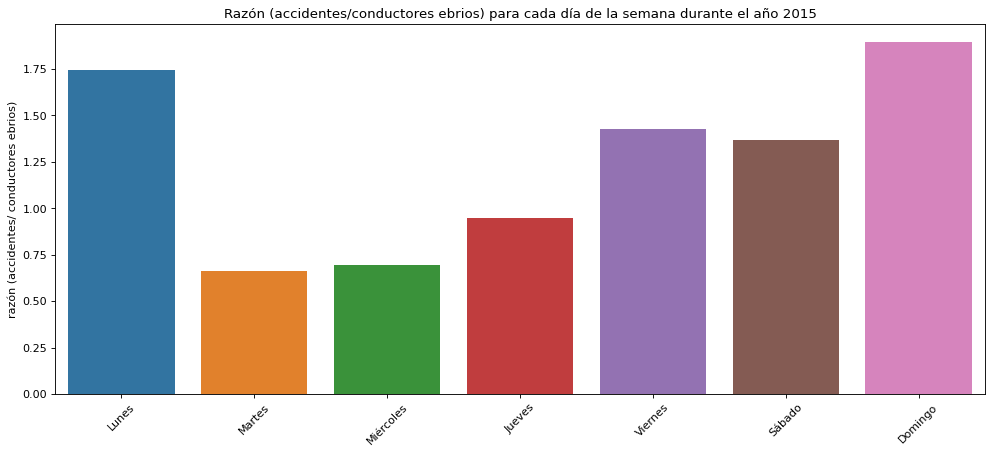

In [111]:
figure(figsize=(15, 6), dpi=80)


grafico = sns.barplot(data = df_ebrios_dias, x = 'day_of_week', y = 'razon')

plt.ylabel('razón (accidentes/ conductores ebrios)')
plt.xlabel('')
plt.xticks(rotation=45)
grafico.set_xticklabels( ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.title('Razón (accidentes/conductores ebrios) para cada día de la semana durante el año 2015')
plt.show()

Se logra notar que los fines de semana es cuando más aumenta la razón, lo que pued explicarse a que son los días de esparcimiento de las personas por lo que suelen consumir bebidas alcohólicas.